# Workbook #3
This workbook goes over examining two and more variables at a time. We will then examine interactions.

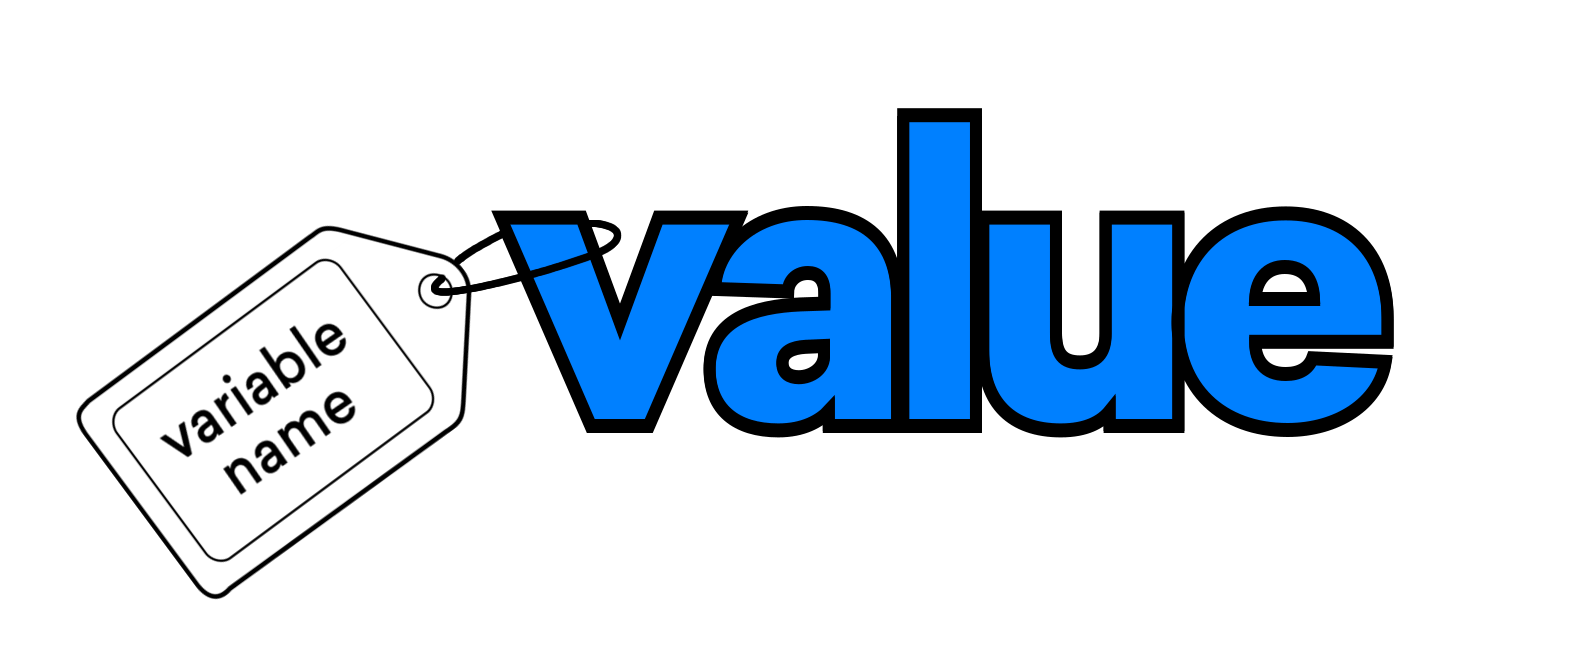

Last week, we talked about variables. There are categorical and numeric variables. When we modeling relationships, it has to be between at least two different variables.
* Relationship between two categorical variables
* Relationship between two numeric variables
* Relationship between one categorical and one numeric variable.

### Quick Recap into hypothesis testing
* Null hypothesis means no relationship, no difference, no inequality, everything is equal, in other words "status quo". As scientists we are usually trying to "disprove" the null hypothesis. As sociologists want to disprove null hypothesis because we want to show the differences, the inequalities in society. Null hypothesis is denoted by $ H_{0} $ : $ \beta_{1} = 0 $
* Alternative hypothesis is the relationship, the difference, the inequality. We develop alternative hypotheses based on social theory or experiences from the ground. The alternative hypothesis could be  $ H_{1} $ : $ \beta_{1} \neq 0 $
* Hypothesis testing is purpose of using statistical significance.

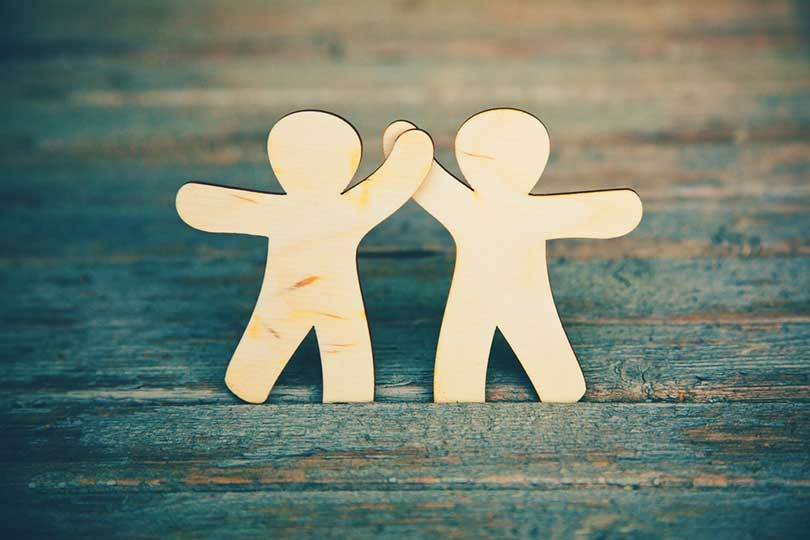

### Relationship between two categorical variables
When establishing an association/relationship between two categorical variables, you look for the following:
* If one variable changes, then the other variable changes.
* If one variable DOES NOT change, then the other variable DOES NOT change.

<b>Table 3.1a: Hypothetical strong association

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 300 | 1000 | 1300 |
|  | 23% | 77% |  |
| Republication | 700 | 200 | 900 |
|  | 78% | 22% | |

<b>Table 3.1b: Hypothetical no association (null relationship)

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 500 | 500 | 1000 |
|  | 50% | 50% |  |
| Republication | 500 | 500 | 1000 |
|  | 50% | 50% | |

<b>Table 1c:  (ACTUAL) Gender and Party Affiliation in 2016

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 550 | 814 | 1364 |
|  | 40% | 60% |  |
| Republication | 457 | 469 | 926 |
|  | 49% | 51% | |

Note: data from General Social Survey 2016

*You can use chi-2 test in Stata to find out if there is a statistically significant relationship between the two vairables. 

In [1]:
*Make a week 3 folder in your SOC 211 folder
*Set-up working directory to your week 3 folder
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week3"

C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week3


In [2]:
sysuse auto
desc


(1978 automobile data)


Contains data from C:\Program Files\Stata17\ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2020 17:45
                                              (_dta has notes)
-------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %8.0g                 Lengt

In [3]:
tab rep78 foreign, chi2


    Repair |
    record |      Car origin
      1978 |  Domestic    Foreign |     Total
-----------+----------------------+----------
         1 |         2          0 |         2 
         2 |         8          0 |         8 
         3 |        27          3 |        30 
         4 |         9          9 |        18 
         5 |         2          9 |        11 
-----------+----------------------+----------
     Total |        48         21 |        69 

          Pearson chi2(4) =  27.2640   Pr = 0.000


Here the null hypthesis is variables rep78 and foreign are independent of each other. Since our chi-2 square value is very high (~27) and the p-value is less than .05, there is a statistically significant relationship between the two variables.

### Relationship between two numeric variables
When examining relationships between two numerical variables, we are able to do more "traditional" statistics with them. 
* A relationship between numerical variables exists if we are able to say whether a change in a variable represents an increase or a decrease in value of another variable.

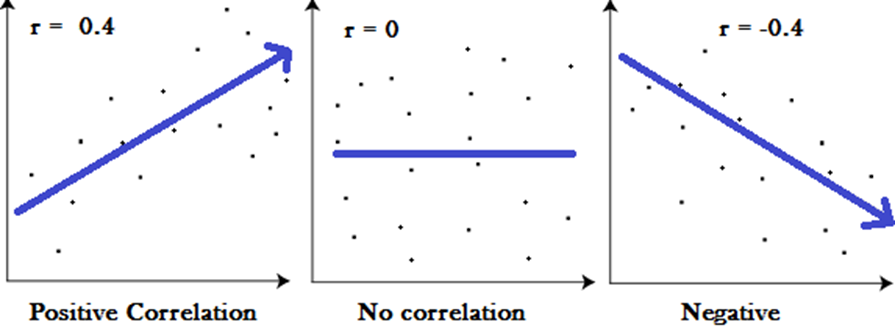

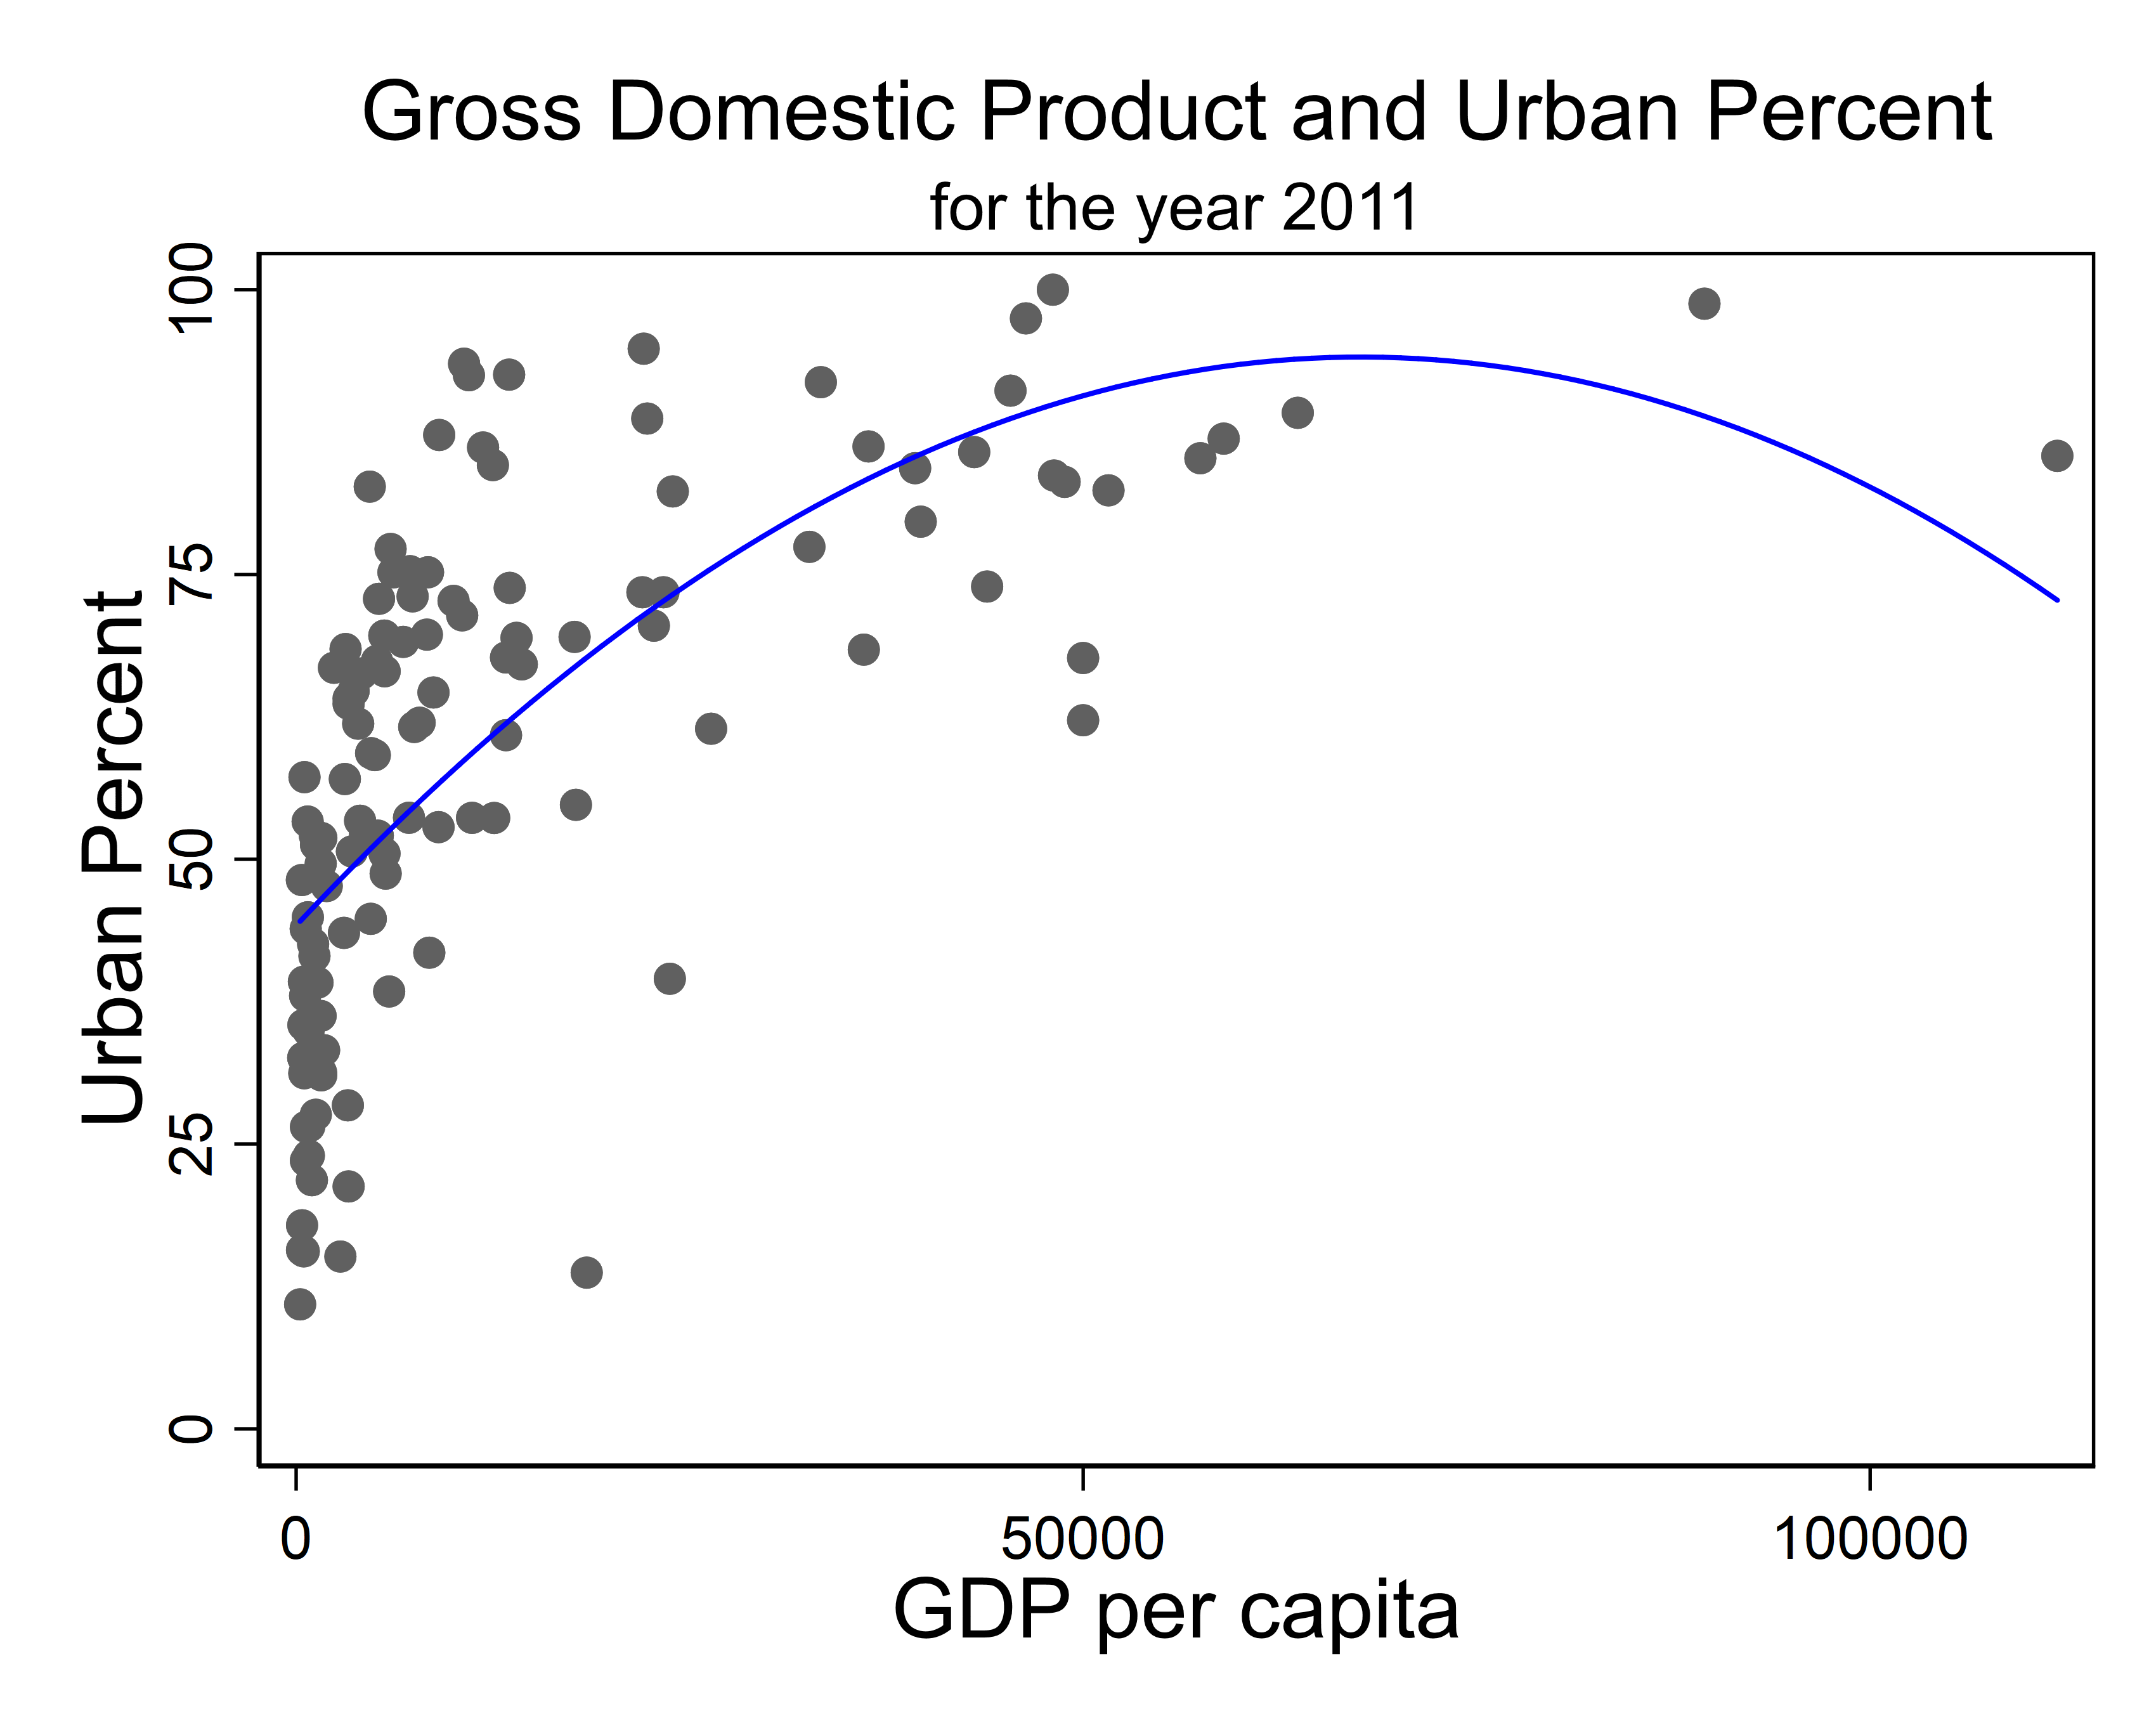

*In Stata, you can run a correlation matrix and you can run a test to see if the relationship is statistically significant.

In [4]:
use "http://www.stata-press.com/data/r13/auto1", clear
desc


(Automobile Models)


Contains data from http://www.stata-press.com/data/r13/auto1.dta
 Observations:            74                  Automobile Models
    Variables:            18                  3 Mar 2013 19:57
-------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------
make            int     %8.0g      make       Make
model           int     %8.0g      model      Model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g      repair     Repair Record 1978
rep77           int     %8.0g      repair     Repair Record 1977
headroom        float   %6.1f                 Headroom (in.)
rear_seat       float   %6.1f                 Rear Seat (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight     

In [5]:
correlate mpg price

(obs=74)

             |      mpg    price
-------------+------------------
         mpg |   1.0000
       price |  -0.4594   1.0000



In [8]:
pwcorr mpg price, obs sig


             |      mpg    price
-------------+------------------
         mpg |   1.0000 
             |
             |       74
             |
       price |  -0.4594   1.0000 
             |   0.0000
             |       74       74
             |


Here, we see a statistically significant relationship between mpg and price. Thus we have failed to accept the null hypothesis between mpg and price.

### Relationship between one categorical and one numeric variable
When examining relationships between categorical and numerical variables, we look for differences across the categories.
* Sometimes it helps to compare averages.

|  | white | Black | Asian | Latinx |
| --- | --- | --- | --- | --- |
| Median household income | 60,869 | 37,364 | 78,141 | 45,719 |

Note: Data from U.S. Census 2016

In Stata, to examine numeric statistics across a categorical variable, you can use the tabstat command.

In [9]:
use "https://www.stata-press.com/data/r17/lbw.dta", clear
desc


(Hosmer & Lemeshow data)


Contains data from https://www.stata-press.com/data/r17/lbw.dta
 Observations:           189                  Hosmer & Lemeshow
                                                data
    Variables:            11                  15 Jan 2020 05:01
-------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------
id              int     %8.0g                 Identification code
low             byte    %8.0g                 Birthweight<2500g
age             byte    %8.0g                 Age of mother
lwt             int     %8.0g                 Weight at last
                                               menstrual period
race            byte    %8.0g      race       Race
smoke           byte    %9.0g      smoke      Smoked during
                                               pregnancy
ptl   

In [10]:
tabstat age


    Variable |      Mean
-------------+----------
         age |   23.2381
------------------------


In [11]:
tabstat age, by(smoke) stat(n mean sd min median max)



Summary for variables: age
Group variable: smoke (Smoked during pregnancy)

    smoke |         N      Mean        SD       Min       p50
----------+--------------------------------------------------
Nonsmoker |       115  23.42609  5.467706        14        23
   Smoker |        74  22.94595  5.047424        14        22
----------+--------------------------------------------------
    Total |       189   23.2381  5.298678        14        23
-------------------------------------------------------------

    smoke |       Max
----------+----------
Nonsmoker |        45
   Smoker |        35
----------+----------
    Total |        45
---------------------


<b> In Stata, you can do a difference of mean test between a categorical variable with TWO categories. </b>

In [15]:
ttest age, by(smoke)


Two-sample t test with equal variances
-------------------------------------------------------------------
> -----------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf
> . interval]
---------+---------------------------------------------------------
> -----------
Nonsmoke |     115    23.42609    .5098662    5.467706    22.41605 
>    24.43613
  Smoker |      74    22.94595    .5867511    5.047424    21.77655 
>    24.11534
---------+---------------------------------------------------------
> -----------
Combined |     189     23.2381    .3854221    5.298678    22.47779 
>     23.9984
---------+---------------------------------------------------------
> -----------
    diff |             .480141    .7909778               -1.080245 
>    2.040528
-------------------------------------------------------------------
> -----------
    diff = mean(Nonsmoke) - mean(Smoker)                          t
>  =   0.6070
H0: diff = 0                                     Degrees o

In [16]:
ttest bwt, by(smoke)


Two-sample t test with equal variances
-------------------------------------------------------------------
> -----------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf
> . interval]
---------+---------------------------------------------------------
> -----------
Nonsmoke |     115    3054.957     70.1625     752.409    2915.965 
>    3193.948
  Smoker |      74    2772.297    76.70106    659.8075    2619.432 
>    2925.162
---------+---------------------------------------------------------
> -----------
Combined |     189    2944.286    53.02811     729.016    2839.679 
>    3048.892
---------+---------------------------------------------------------
> -----------
    diff |            282.6592    106.9544                71.66693 
>    493.6515
-------------------------------------------------------------------
> -----------
    diff = mean(Nonsmoke) - mean(Smoker)                          t
>  =   2.6428
H0: diff = 0                                     Degrees o

Here, we find no statistical significant for the null hypothesis, therefore there is not a statistical significance relationship between smoking and age.

To do difference of mean across multiple categgories, you need to do ANOVA. That is more advanced stuff we will do later.

# Interactions
The previous relationships we spoke about were between TWO variables. Typically, when we examine more than two variables, we use regression techniques. Interactions are terms we can use within regression modeling. It is a very powerful statistical tool.

<img src="https://printables.space/files/uploads/download-and-print/large-printable-numbers/plus-a4-1200x1697.jpg" width=100 height=100>

<center>$y_i=\beta_0+\beta_1*(variablea_i)+\beta_2*(variableb_i)+e_i$

Last week, we have talked about modeling and relationships. Typically, if we are modeling independent variables onto a dependent variable. 
* <b>Additive effects</b> are found when independent variables are left singular or without transformation. For example, we have a model where we have independent variables of gender, race, and age. The dependent variable is hourly wage. Here is what the model would look like:

<center>$(hourly wage)_{i} = \beta_{0} + \beta_{1}(gender_{i}) + \beta_{2}(race_{i}) + \beta_{3}(age_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable (hourly wgae), the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the coefficient estimate for gender
    
$\beta_{2}$ is the coefficient estimate for race
    
$\beta_{3}$ is the coefficient estimate for age
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

<img src="https://www.shareicon.net/data/2016/03/02/727494_multiple_512x512.png" width=100 height=100>

<center>$y_i=\beta_0+\beta_1*(variablea_i)+\beta_2*(variableb_i)+\beta_3*(variablea_i X variableb_i)+e_i$

* <b>Interaction effects</b> (e.g., between variables a and b) to test whether variable <i>a</i> changes the effect that variable <i>b</i> has on the outcome. For example, we have a model where we have dependent variable hourly wage. The independent variables of gender, race, and age. We are interested to know how race effects the relationship of gender on hourly wage. We can evaluate this relationship by using an interaction term race*gender. The model would look like this:

<center>$(hourly wage)_{i} = \beta_{0} + \beta_{1}(gender_{i}) + \beta_{2}(race_{i}) + \beta_{3}(age_{i}) + \beta_{4}(gender*race_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable (hourly wgae), the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the coefficient estimate for gender
    
$\beta_{2}$ is the coefficient estimate for race
    
$\beta_{3}$ is the coefficient estimate for age
   
$\beta_{4}$ is the coefficient estimate of the interaction between gender and race
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

<div class="alert alert-block alert-warning">
Remember, if you include an interaction term into the model---you must always have the additive and interaction terms included in the model. </div>

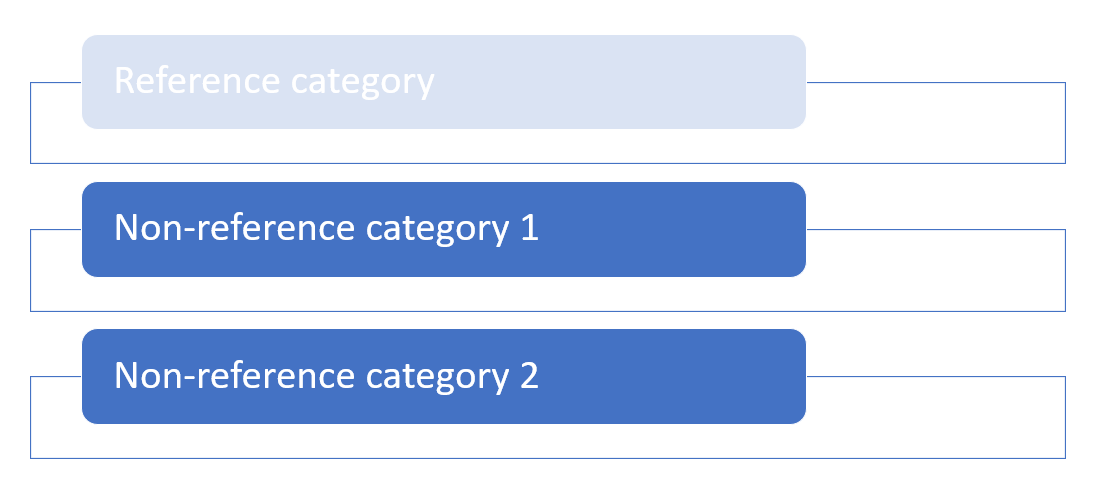

## Reference categories: <i>an important note about categorical variables</i>
Remember, that when using categorical variables in a regression model, you must set one of the categories in the categorical variable as the "reference category." All the beta estimates are referred back to that reference category.

In [17]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook hlthstat female




-------------------------------------------------------------------
hlthstat                                              Health status
-------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: hlth

                 Range: [1,8]                         Units: 1
         Unique values: 6                         Missing .: 2/10,3
> 51

            Tabulation: Freq.   Numeric  Label
                        2,407         1  Excellent
                        2,591         2  Very good
                        2,938         3  Good
                        1,670         4  Fair
                          729         5  Poor
                           14         8  Blank but applicable
                            2         .  

-------------------------------------------------------------------
female                                                       Female
----------------------------------------------------------

In [22]:
regress hlthstat female


      Source |       SS           df       MS      Number of obs   
> =    10,349
-------------+----------------------------------   F(1, 10347)     
> =     10.71
       Model |   15.966316         1   15.966316   Prob > F        
> =    0.0011
    Residual |  15428.8347    10,347  1.49114088   R-squared       
> =    0.0010
-------------+----------------------------------   Adj R-squared   
> =    0.0009
       Total |   15444.801    10,348  1.49253972   Root MSE        
> =    1.2211

-------------------------------------------------------------------
> -----------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf
> . interval]
-------------+-----------------------------------------------------
> -----------
      female |   .0786557   .0240374     3.27   0.001     .0315378 
>    .1257736
       _cons |   2.552187    .017418   146.53   0.000     2.518045 
>     2.58633
-------------------------------------------------------------------
> -----------


Based on the regression results, here is our regression line:

<center>$(healthstat_i) = \beta_0 + \beta_1*(female_i)$

<center>$(healthstat_i) = 2.55 + .08*(female_i)$

* Female is a categorical variable where 0=man and 1=woman. 
* Coefficient for female is .08 meaning women have greater .08 points on "healthstat" variables COMPARED TO THE REFERENCE CATEGORY. The interpretation of "healthstat" is higher means poorer health. 
* The reference category here is man, so women have greater .08 points on "healthstat" variables COMPARED to men. So women report statistically significant lower health as compared to men. 
* One limitation of categorical variable, is you can only refer the estimate for the categorical variable back to the reference category.
* You get to choose what variable is the reference category.

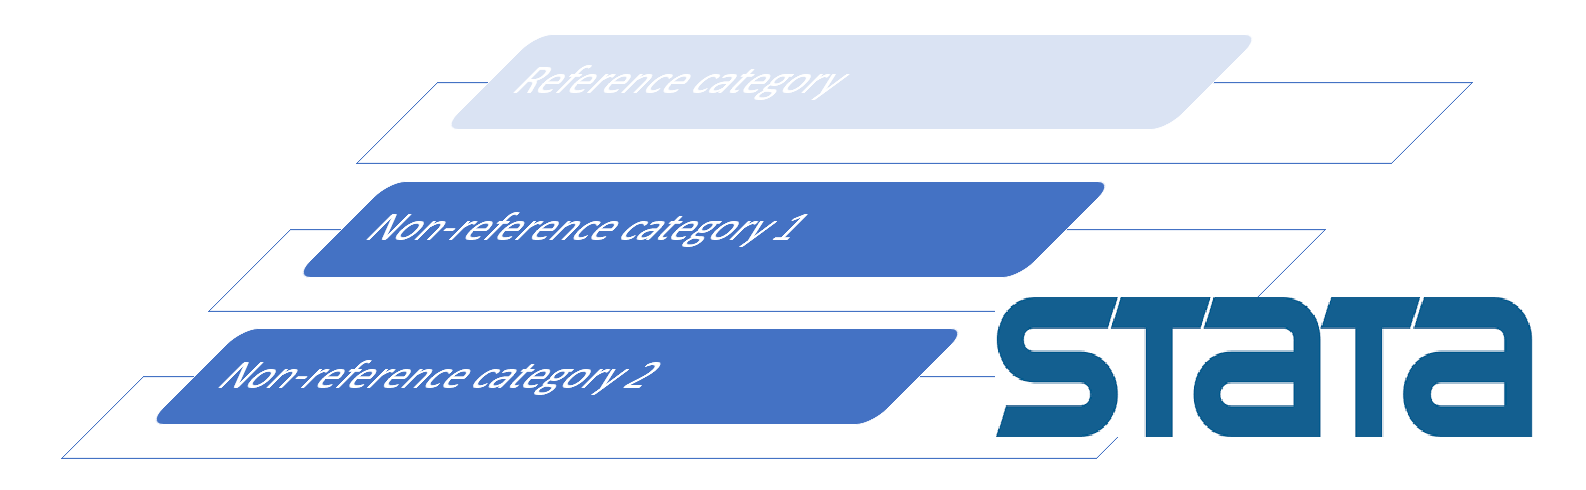

### Another important note about estimating categorical variables in Stata
Categorical variables must be in dummy variable format to run in Stata. Dummy variables are just variables represented by 0/1. So, let's say we have a region variable with the categories of northeast (1), mountain west (2), south (3), and west (4). 

| index | region |
| --- | --- | 
| 1 | 3 | 
| 2 | 2 |
| 3 | 2 | 
| 4 | 1 | 
| 5 | 1 | 
| 6 | 4 |
| 7 | 1 | 
| 8 | 3 | 

The region variable can be converted into four dummies variables:

| index | region | ne | mw | s | w |
| --- | --- | --- | --- | --- | --- |
| 1 | 3 | 0 | 0 | 1 | 0 |
| 2 | 2 | 0 | 1 | 0 | 0 |
| 3 | 2 | 0 | 1 | 0 | 0 |
| 4 | 1 | 1 | 0 | 0 | 0 |
| 5 | 1 | 1 | 0 | 0 | 0 |
| 6 | 4 | 0 | 0 | 0 | 1 |
| 7 | 1 | 1 | 0 | 0 | 0 |
| 8 | 3 | 0 | 0 | 1 | 0 |

Region is a categorical variable. ne, mw, s, and w are dummy variables. This is how to do it in Stata.

In [6]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook region




--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/10,351

            Tabulation: Freq.   Numeric  Label
                        2,096         1  NE
                        2,774         2  MW
                        2,853         3  S
                        2,628         4  W


In [7]:
*This command makes separate dummy variables for each categorical variable
tabulate region, gen(dum)
    rename dum1 region_ne
    rename dum2 region_mw
    rename dum3 region_s
    rename dum4 region_w



     Region |      Freq.     Percent        Cum.
------------+-----------------------------------
         NE |      2,096       20.25       20.25
         MW |      2,774       26.80       47.05
          S |      2,853       27.56       74.61
          W |      2,628       25.39      100.00
------------+-----------------------------------
      Total |     10,351      100.00






In [8]:
regress hlthstat region_mw region_s region_w


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   region_mw |   .0696536   .0351191     1.98   0.047     .0008134    .1384938
    region_s |    .380573   .0349066    10.90   0.000     .3121494    .4489966
    region_w |    .207626   .0355336     5.84   0.000     .1379732    .2772787
       _cons |   2.417184   .0265059    91.19   0.

### An easier way is to put a "i." in front of the categorical variable and Stata will automatically make the dummies to estimate the regression model

In [9]:
*Also, in Stata you want to use "i." to indicate categorical variable to Stata
regress hlthstat i.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         MW  |   .0696536   .0351191     1.98   0.047     .0008134    .1384938
          S  |    .380573   .0349066    10.90   0.000     .3121494    .4489966
          W  |    .207626   .0355336     5.84   0.000     .1379732    .2772787
             |
       _cons |   2.4

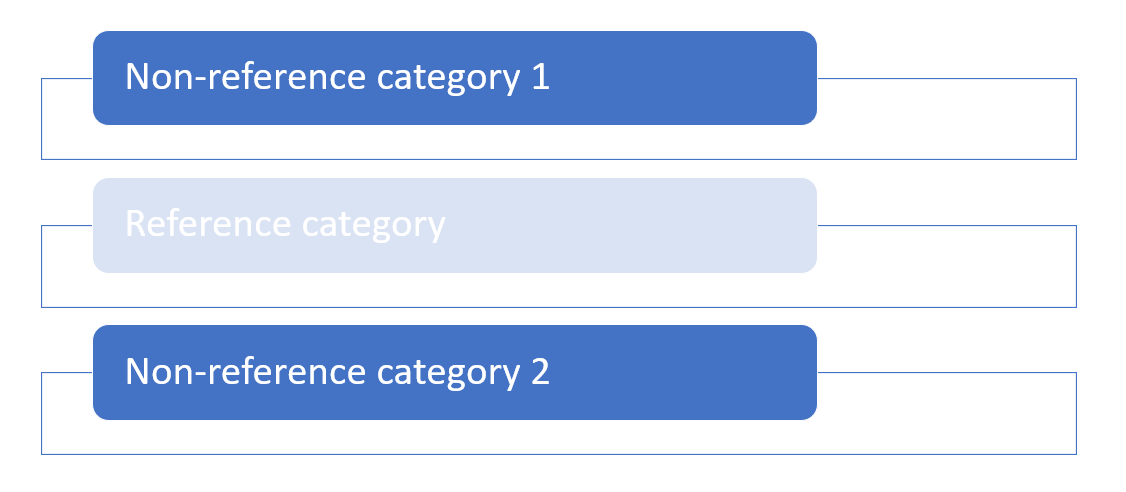

## Specifiying particular category as a reference category in Stata
Let's say, we have a categorical variable with mutiple categories. You can choose which ever category to be the reference. Here is how you can specify to Stata the specific reference category.

In [10]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
*This command gives you a all the numeric values of the categories.
*You are going to need to know the specific numeric value of the category.
codebook region




--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 0/10,351

            Tabulation: Freq.   Numeric  Label
                        2,096         1  NE
                        2,774         2  MW
                        2,853         3  S
                        2,628         4  W


Let's say, we want South region to be the reference category. South is region==3

In [11]:
regress hlthstat ib3.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   -.380573   .0349066   -10.90   0.000    -.4489966   -.3121494
         MW  |  -.3109194   .0323526    -9.61   0.000    -.3743367    -.247502
          W  |   -.172947   .0328021    -5.27   0.000    -.2372454   -.1086486
             |
       _cons |   2.7

"Heathstat" is lower in northeast, mountainwest, and west regions as compared to the south region. 

In [12]:
regress hlthstat ib4.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   -.207626   .0355336    -5.84   0.000    -.2772787   -.1379732
         MW  |  -.1379724   .0330282    -4.18   0.000     -.202714   -.0732308
          S  |    .172947   .0328021     5.27   0.000     .1086486    .2372454
             |
       _cons |    2.

"Heathstat" is lower in northeast and mountainwest regions as compared to the west region. "Heathstat" is greater in south region as compared to the west region. 

<img src="https://mathinsight.org/media/applet/image/large/cartesian_coordinate_axes_3d.png" width=300 height=300>

## Generally, we have three types of interactions. 
* Interaction term between two categorical variables
* Interaction term between one categorical variable and one numeric variable.
* Interaction term between two numeric variables

We will go over how to evaluate interactions in regression models in Stata.

## Interaction term between two categorical variables

So, we are interested in the understanding the role of age, gender, and region onto body mass index (bmi). Age and bmi are numeric variables. Gender and region are categorical variables.

<b>Additive model</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)++\beta_4*(S_i)+\beta_5*(W_i)$

Then, we say for some hypothetical reason, we think the effect of gender on bmi changes based on region. We can evaluate this by using interaction terms.

<b>Interaction model</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)+\beta_4*(S_i)+\beta_5*(W_i)+\beta_6*(female_ixMW_i)+\beta_7*(female_ixS_i)+\beta_8*(female_ixW_i)$ </center>
    
* Notheast is the reference category

In [13]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
desc




Contains data from https://www.stata-press.com/data/r17/nhanes2.dta
 Observations:        10,351                  
    Variables:            58                  20 Dec 2020 10:07
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
sampl           long    %9.0g                 Unique case identifier
strata          byte    %9.0g                 Stratum identifier
psu             byte    %9.0g      psulbl     Primary sampling unit
region          byte    %9.0g      region     Region
smsa            byte    %22.0g     smsalbl    SMSA type
location        byte    %9.0g                 Location (stand office ID)
houssiz         byte    %9.0g                 Number of people in household
sex             byte    %9.0g      sex        Sex
race            byte    %9.0g      race     

In [14]:
*Additive model
regress bmi age i.female i.region


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(5, 10345)     =     63.02
       Model |  7390.19781         5  1478.03956   Prob > F        =    0.0000
    Residual |  242633.964    10,345  23.4542256   R-squared       =    0.0296
-------------+----------------------------------   Adj R-squared   =    0.0291
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.843

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0488851   .0027674    17.66   0.000     .0434605    .0543097
             |
      female |
     Female  |   .0372717   .0953357     0.39   0.696    -.1496047    .2241481
             |
      region |
         MW  |   .0064779   .1402121     0.05   0.963     -.268365   

<b>In Stata, you can do the following: </b>
* Use the "##" notation between the two variables you want the interaction term. Using the "##" includes the additive and interaction terms. For example i.female##i.region
* Use the "#" notation between the two variables you want the interaction term. Using the "#" includes only the interaction term. For example i.female#i.region

In [15]:
*Interatice model
*Notice how I don't include the additive terms.
*this is equal to regress bmi age i.female i.region female#region
regress bmi age female##region


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(8, 10342)     =     40.30
       Model |  7559.19099         8  944.898874   Prob > F        =    0.0000
    Residual |  242464.971    10,342  23.4446888   R-squared       =    0.0302
-------------+----------------------------------   Adj R-squared   =    0.0295
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.842

-------------------------------------------------------------------------------
          bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
          age |   .0488087   .0027671    17.64   0.000     .0433846    .0542328
              |
       female |
      Female  |  -.2939562   .2116093    -1.39   0.165    -.7087514    .1208389
              |
       region |
          MW  |  -.1420836   .2023593    -0.70   0.483     -

<b>We can make an estimated linear equation for each combination of female and region</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)+\beta_4*(S_i)+\beta_5*(W_i)+\beta_6*(female_ixMW_i)+\beta_7*(female_ixS_i)+\beta_8*(female_ixW_i)$

<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(female_i)+(-.14)*(MW_i)+(-.33)*(S_i)+(-.27)*(W_i)+.29*(female_ixMW_i)+.71*(female_ixS_i)+.23*(female_ixW_i)$

<b>female=0, northeast=1, mountain west=0, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(0)+(-.27)*(0)+.29*(0x0)+.71*(0x0)+.23*(0x0)$
    
<center>$(bmi_i) = 23.39 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(1)+(-.33)*(0)+(-.27)*(0)+.29*(0x1)+.71*(0x0)+.23*(0x0)$
    
<center>$(bmi_i) = 23.25 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(1)+(-.27)*(0)+.29*(0x0)+.71*(0x1)+.23*(0x0)$
    
<center>$(bmi_i) = 23.06 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=0, south=0, west=1</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(0)+(-.27)*(1)+.29*(0x0)+.71*(0x0)+.23*(0x1)$
    
<center>$(bmi_i) = 22.79 + .05*(age_i)$

<b>female=1, northeast=1, mountain west=0, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(0)+(-.27)*(0)+.29*(1x0)+.71*(1x0)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29)+ .05*(age_i)$
    
<center>$(bmi_i) = 23.1+ .05*(age_i)$

<b>female=1, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(1)+(-.33)*(0)+(-.27)*(0)+.29*(1x1)+.71*(1x0)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29-.14+.29) + .05*(age_i)$
    
<center>$(bmi_i) = 23.25 + .05*(age_i)$

<b>female=1, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(1)+(-.27)*(0)+.29*(1x0)+.71*(1x1)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29-.33+.71) + .05*(age_i)$
    
<center>$(bmi_i) = 23.48 + .05*(age_i)$

<b>female=1, northeast=0, mountain west=0, south=0, west=1</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(0)+(-.27)*(1)+.29*(1x0)+.71*(1x0)+.23*(1x1)$
    
<center>$(bmi_i) = (23.39-.29-.27+.23) + .05*(age_i)$
    
<center>$(bmi_i) = (23.06) + .05*(age_i)$

<i>You can estimate bmi by pulling in age values. For example, the average age.</i>

In [17]:
summarize age


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74


<b> age=47.58, female=1, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i) = (23.25) + .05*(age_i) $

<center>$(bmi_i) = (23.25) + .05*(47.58) $
    
<center>$(bmi_i) = 25.63$

<b> age=47.58, female=1, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i) = 23.48 + .05*(age_i)$

<center>$(bmi_i) = 23.48 + .05*(47.58)$
    
<center>$(bmi_i) = 25.86$

In [18]:
*quietly command runs the command without posting the outprint
quietly regress bmi age female##region
*this post estimation command tells you how to call which variables
regress, coeflegend




      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(8, 10342)     =     40.30
       Model |  7559.19099         8  944.898874   Prob > F        =    0.0000
    Residual |  242464.971    10,342  23.4446888   R-squared       =    0.0302
-------------+----------------------------------   Adj R-squared   =    0.0295
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.842

-------------------------------------------------------------------------------
          bmi | Coefficient  Legend
--------------+----------------------------------------------------------------
          age |   .0488087  _b[age]
              |
       female |
      Female  |  -.2939562  _b[1.female]
              |
       region |
          MW  |  -.1420836  _b[2.region]
           S  |  -.3347762  _b[3.region]
           W  |  -.2694841  _b[4.region]
              |
female#region |
   Female#MW  |   .2897474  _b

### Margins command in Stata
The margins command is a easy way to graph these results in Stata. It is a postestimation command, so you have to regress first.

In [19]:
*The margins command helps calculate estiamtes for interactions
margins region#female, at(age=47.57965)


Adjusted predictions                                    Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
At: age = 47.57965

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
region#female |
     NE#Male  |   25.71501   .1517587   169.45   0.000     25.41753    26.01248
   NE#Female  |   25.42105   .1474742   172.38   0.000     25.13197    25.71013
     MW#Male  |   25.57292   .1338383   191.07   0.000     25.31058    25.83527
   MW#Female  |   25.56872   .1265618   202.03   0.000     25.32063     25.8168
      S#Male  |   25.38023   .1326702   191.30   0.000     25.12017    25.64029
    S#Female  |   25.79874   .1241829   207.75   0.000     25.55532    26.04216
      W#Male  |   25.44552   .1366851   186.16   0.000     25.17759

In [20]:
*female=0, all region variables=0 and age=47.57965
*this matches NE#Male
di _b[_cons]+(_b[age])*47.57965

25.715008


In [21]:
marginsplot, noci
graph export "marginsplot_bmi_female_region.png", replace width(3400)



Variables that uniquely identify margins: region female

file C:/Users/acade/.stata_kernel_cache/graph0.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph0.pdf saved as PDF format

(file marginsplot_bmi_female_region.png not found)
file marginsplot_bmi_female_region.png saved as PNG format


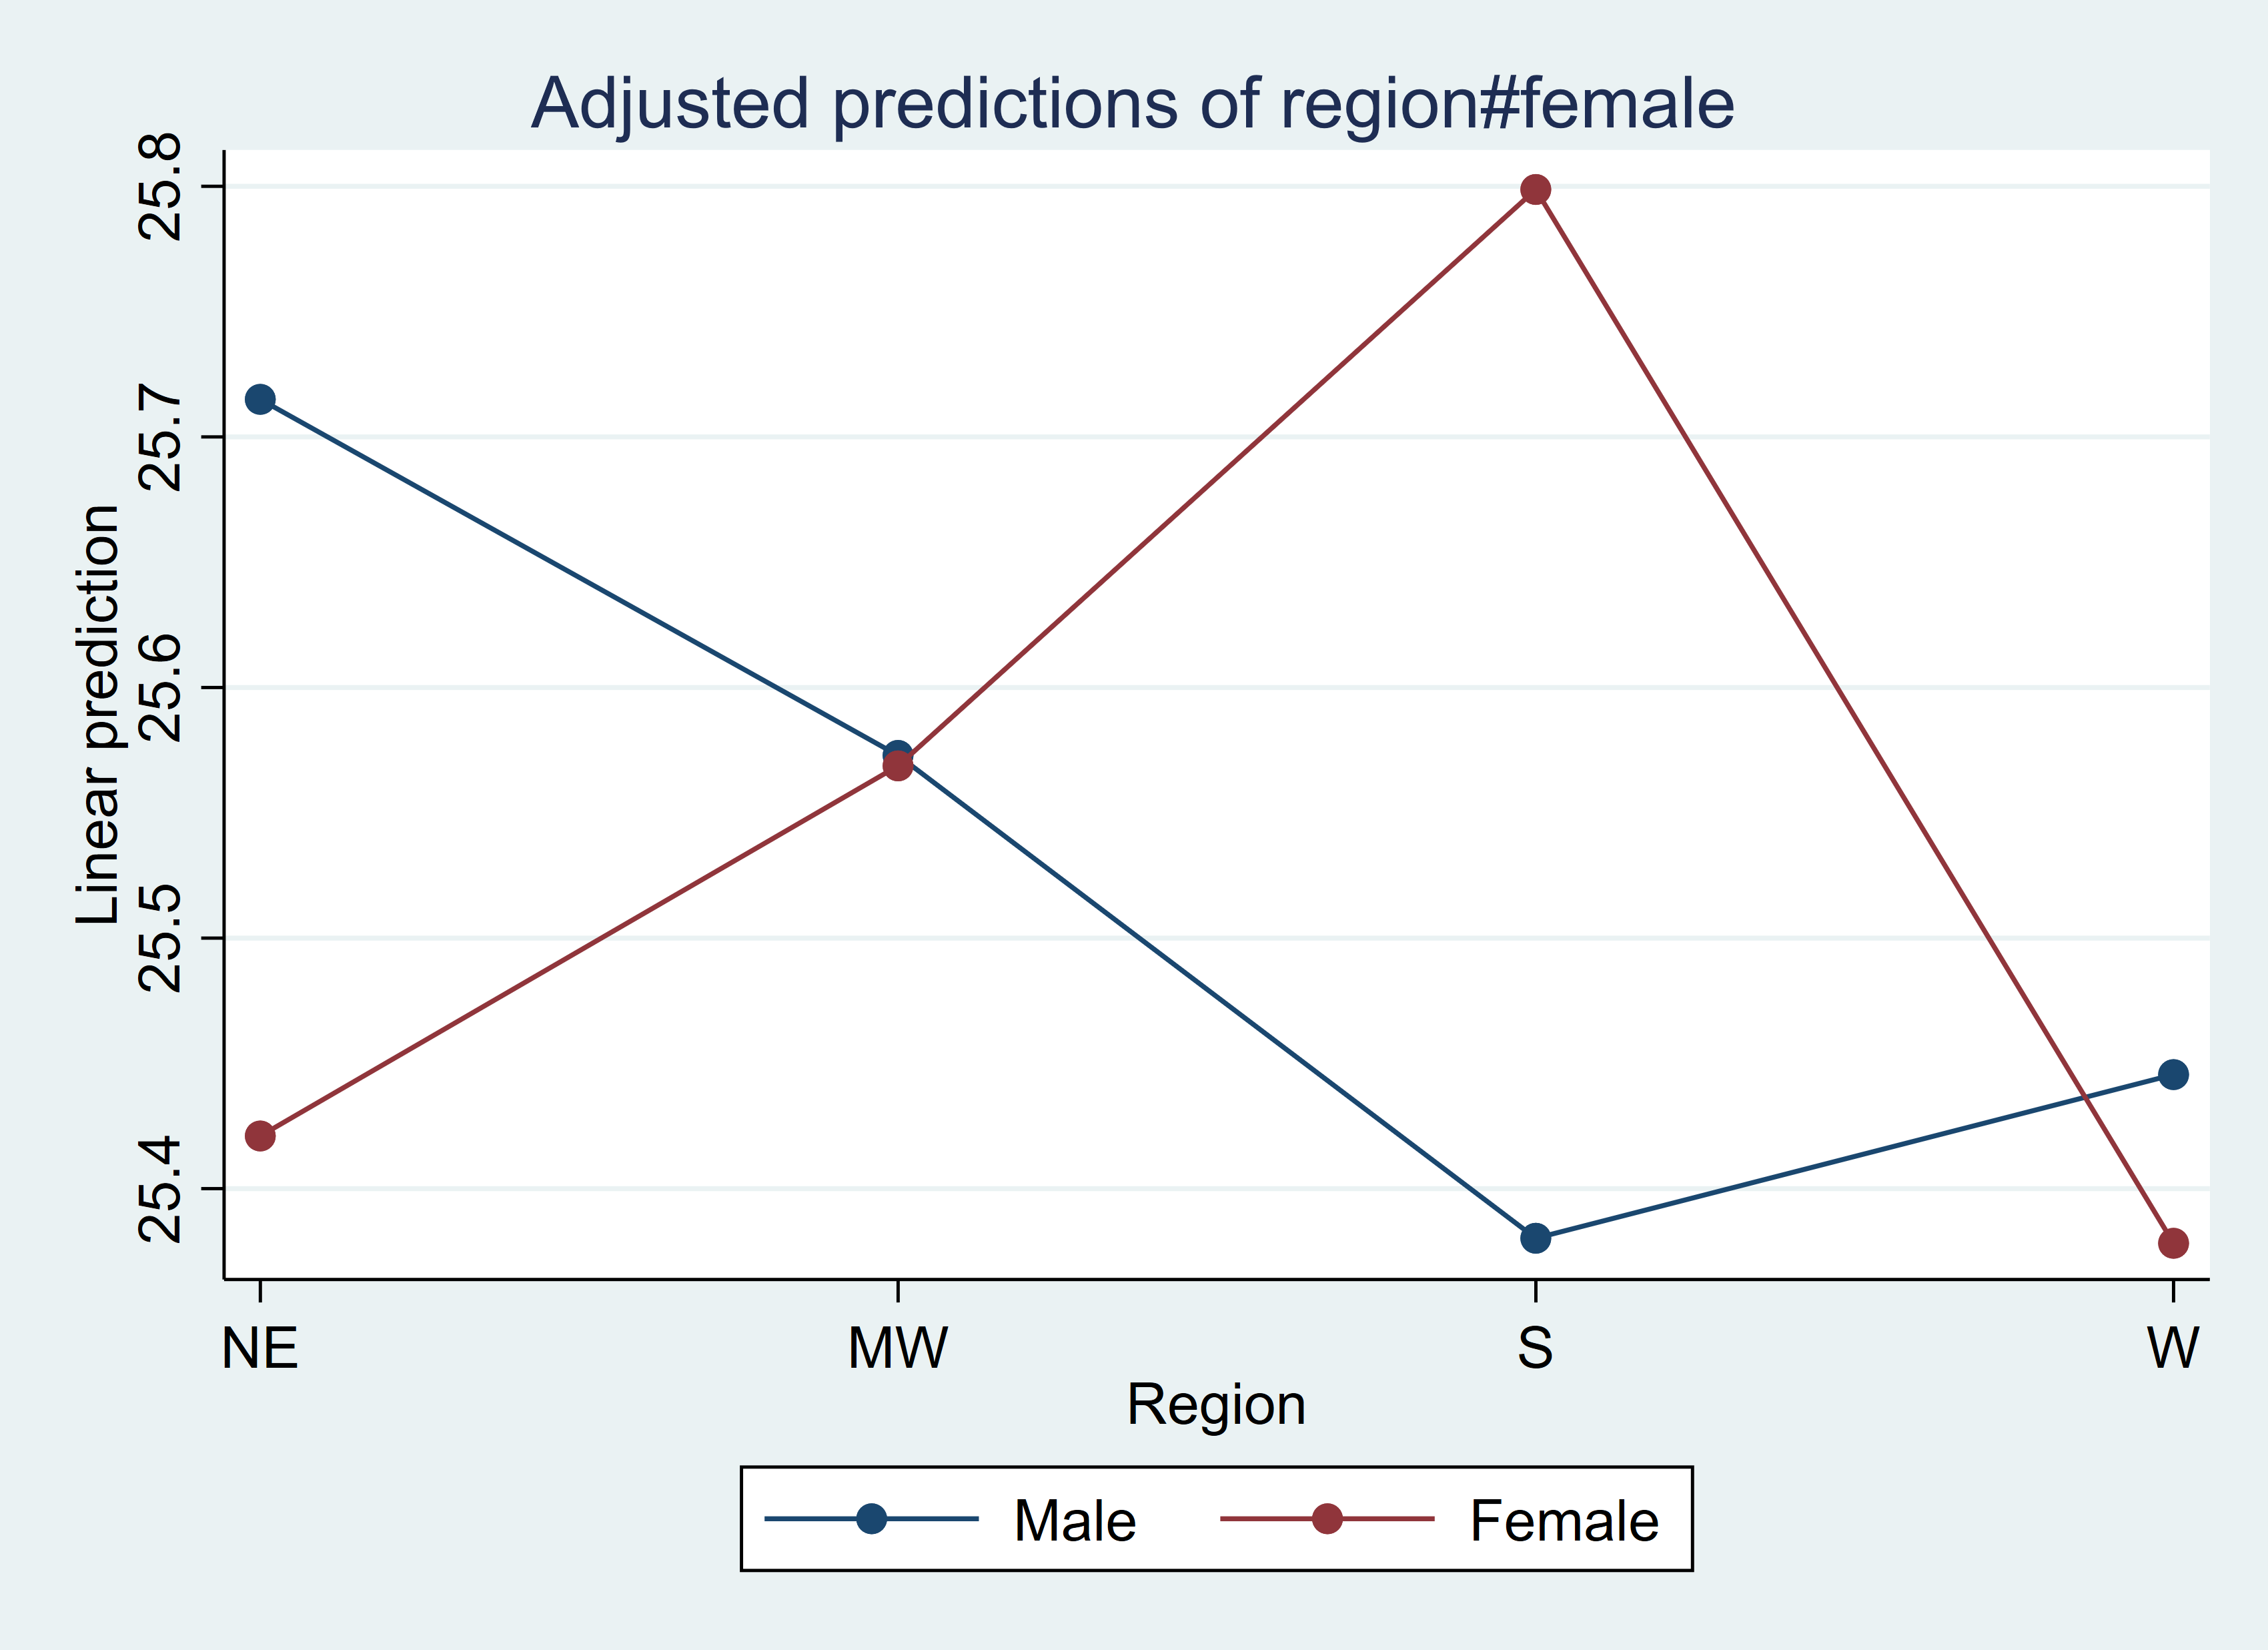

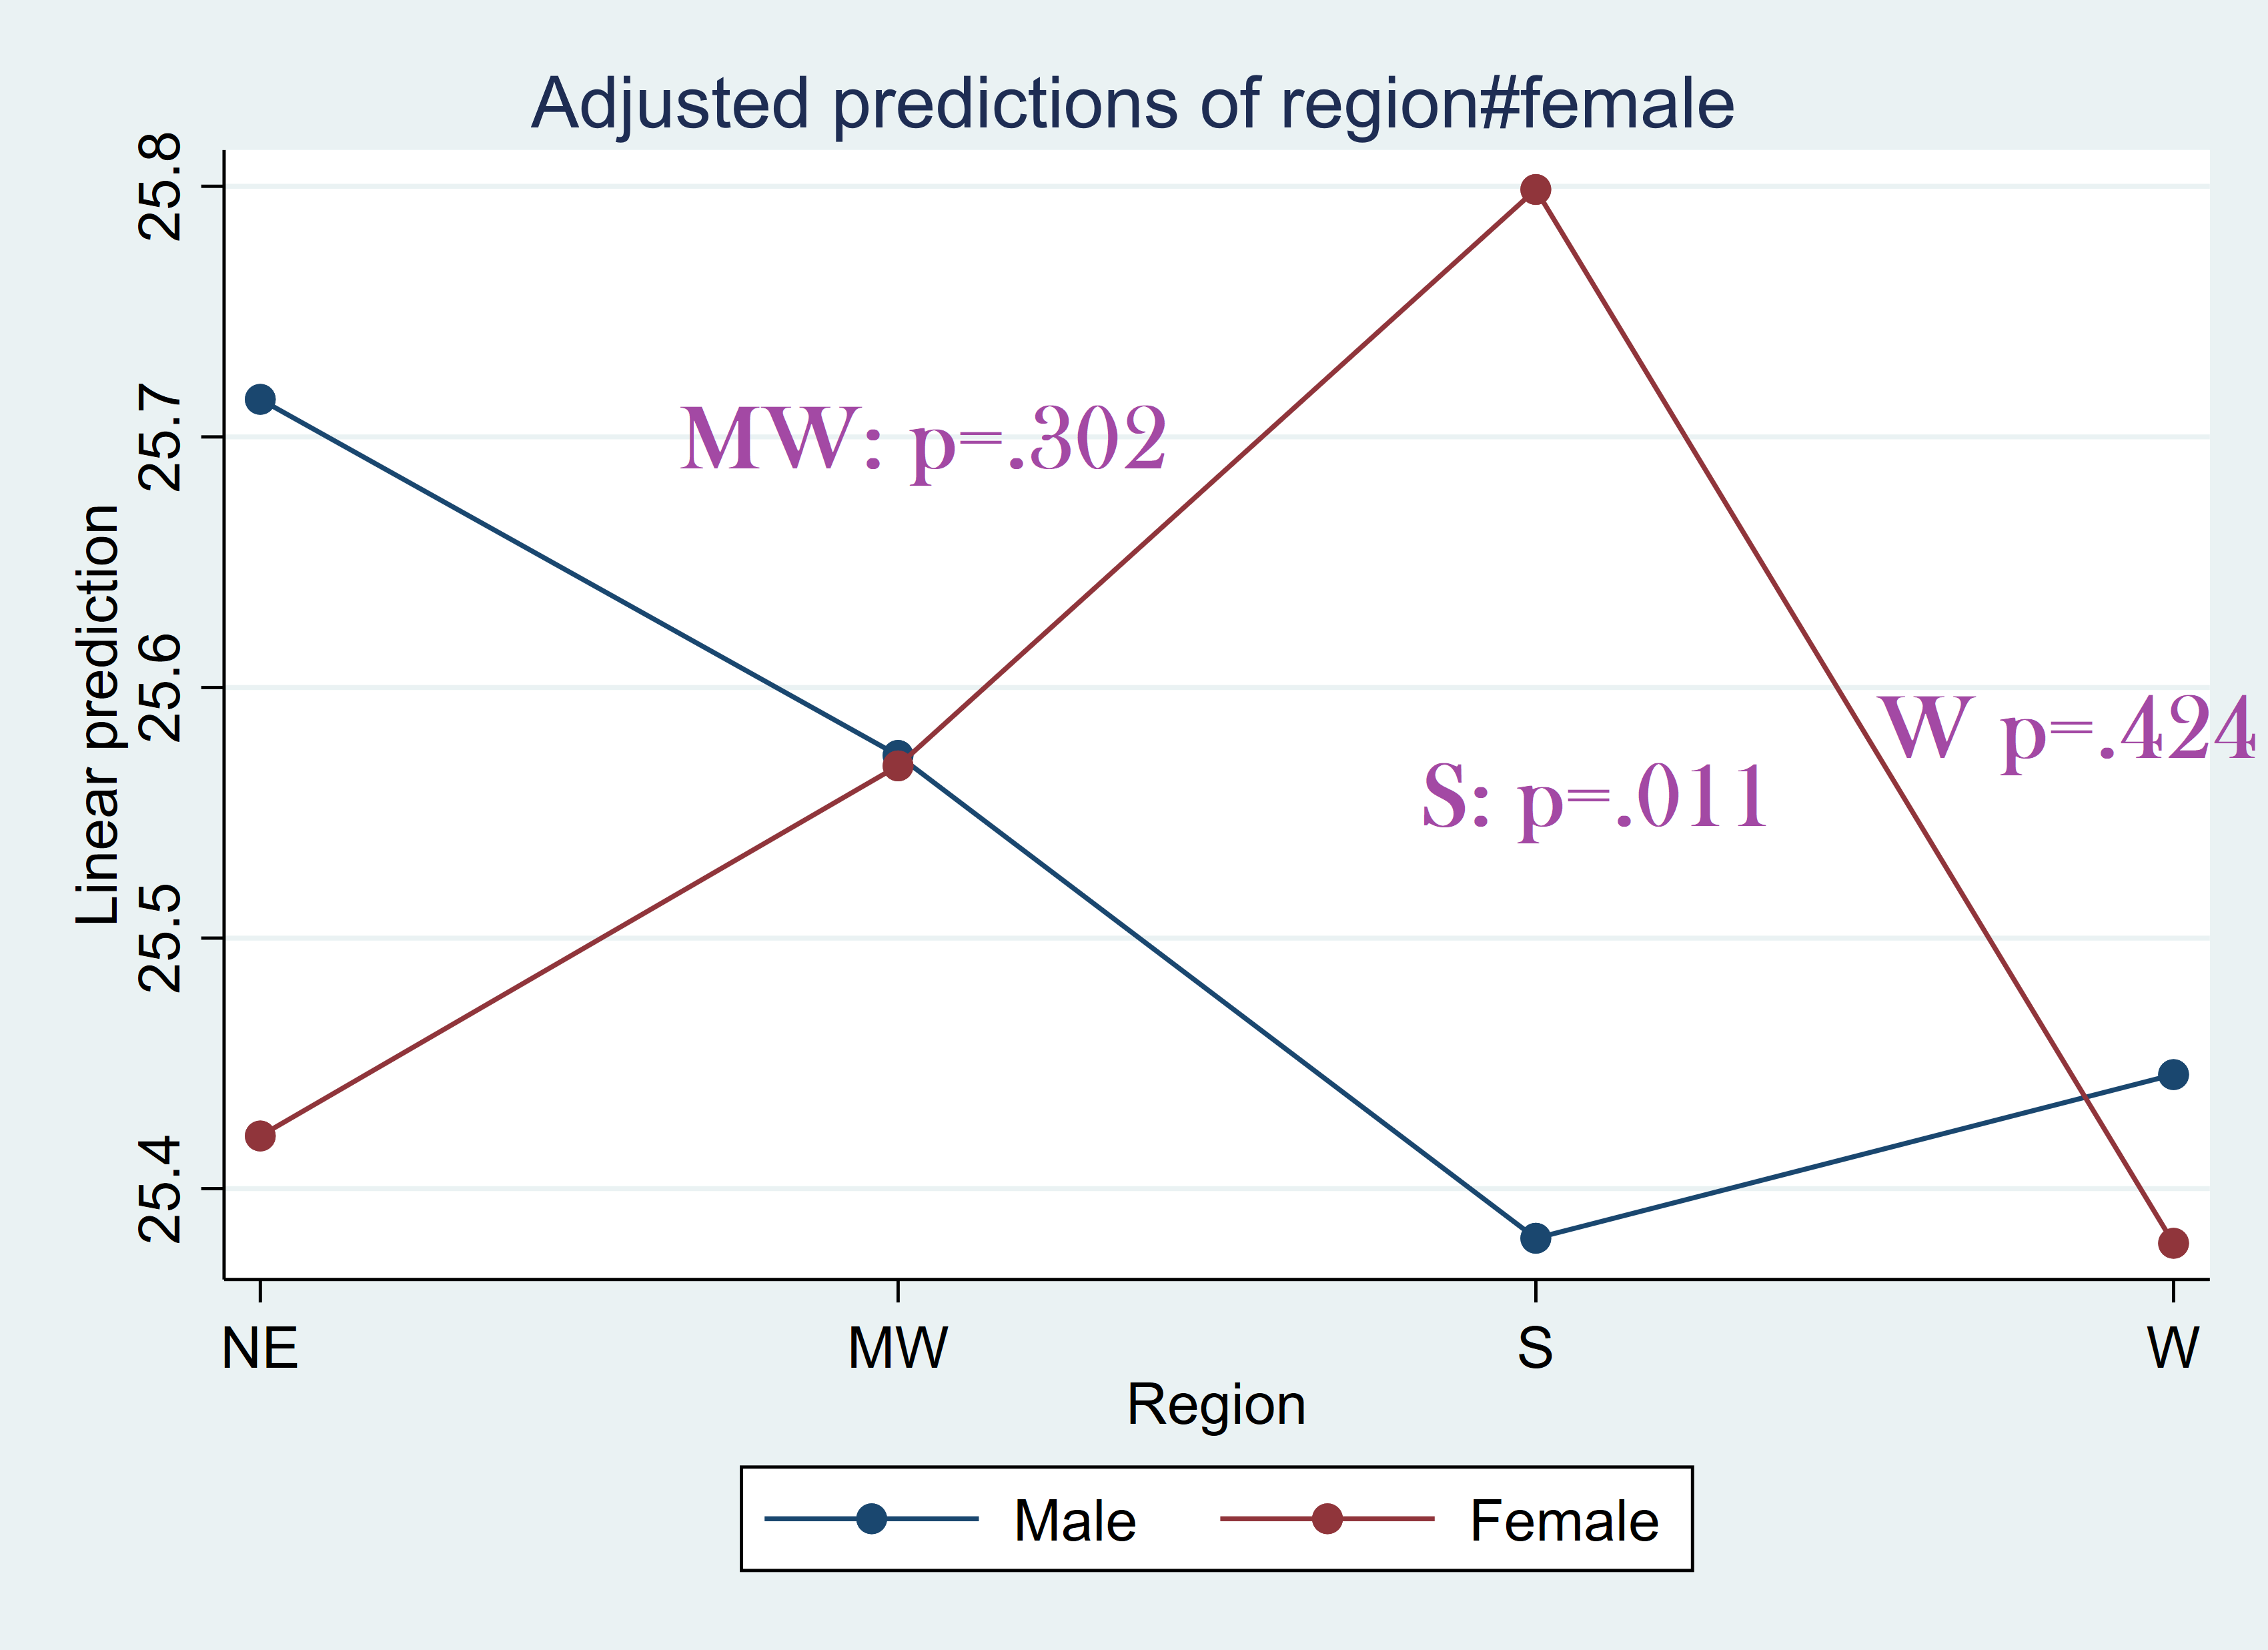

While holding age constant at its mean, we see important the effect of gender on bmi differents based on regions. We can examine which interaction terms are statistically significant to which relatonships are stronger by going back to the regression output. The effect of south region is statistically significant. The effect of gender on bmi is strongest for the south region as compared to northeast.

## Interaction term between one categorical variable and one numeric variable

Let's say, we want to fit a model predicting income across independent variables educational attainment and gender. Here income and educational attainment are numeric variables. Educational attainment is measured in the number of years of school. Gender is a categorical variable.

<b>Additive model</b> 

<center>$(income_i)=\beta_0+\beta_1*(educ_i)+\beta_2*(male_i)$

Here we are interested in whether the effect of educational attainment on income differs between gender.

<b>Interaction model</b>

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

In [22]:
*First let's open our data set.
use "http://www.stata-press.com/data/agis6/c10interaction", clear
desc




Contains data from http://www.stata-press.com/data/agis6/c10interaction.dta
 Observations:           120                  
    Variables:             4                  9 Feb 2016 12:06
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
inc             int     %8.0g                 Income in 1000s
educ            byte    %8.0g                 Years of education
male            byte    %8.0g                 females are 1 and males are 0
alienation      byte    %8.0g                 Alienation 0 to 10
--------------------------------------------------------------------------------
Sorted by: male


In [23]:
regress inc educ male


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(2, 117)       =     37.19
       Model |  100464.105         2  50232.0527   Prob > F        =    0.0000
    Residual |  158015.895       117   1350.5632   R-squared       =    0.3887
-------------+----------------------------------   Adj R-squared   =    0.3782
       Total |      258480       119  2172.10084   Root MSE        =     36.75

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   8.045694   1.008586     7.98   0.000     6.048243    10.04315
        male |   19.04991   6.719787     2.83   0.005     5.741726     32.3581
       _cons |  -42.54411    14.2919    -2.98   0.004    -70.84847   -14.23975
--------------------------------------------------

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(male_i)$

In [24]:
predict yhat
predict incfnoi if male==0
predict incmnoi if male==1


(option xb assumed; fitted values)

(option xb assumed; fitted values)
(60 missing values generated)

(option xb assumed; fitted values)
(60 missing values generated)


<b> male==0</b>

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(0)$

<b>male==1</b>

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(1)$
   
<center>$(income_i)=-23.49+8.05*(educ_i)$

In [25]:
twoway (connected incmnoi educ if male==1, lcolor(red) lpattern(dot) msymbol(diamond) ///
    msize(large)) ///
    (connected incfno educ if male==0, lcolor(black) lpattern(solid) msymbol(circle) ///
    msize(large)), ///
    ytitle(Income in thousands) xtitle(Education) legend(order(1 "Men" 2 "Women"))
graph export "educ_male_additive_twoway.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

(file educ_male_additive_twoway.png not found)
file educ_male_additive_twoway.png saved as PNG format


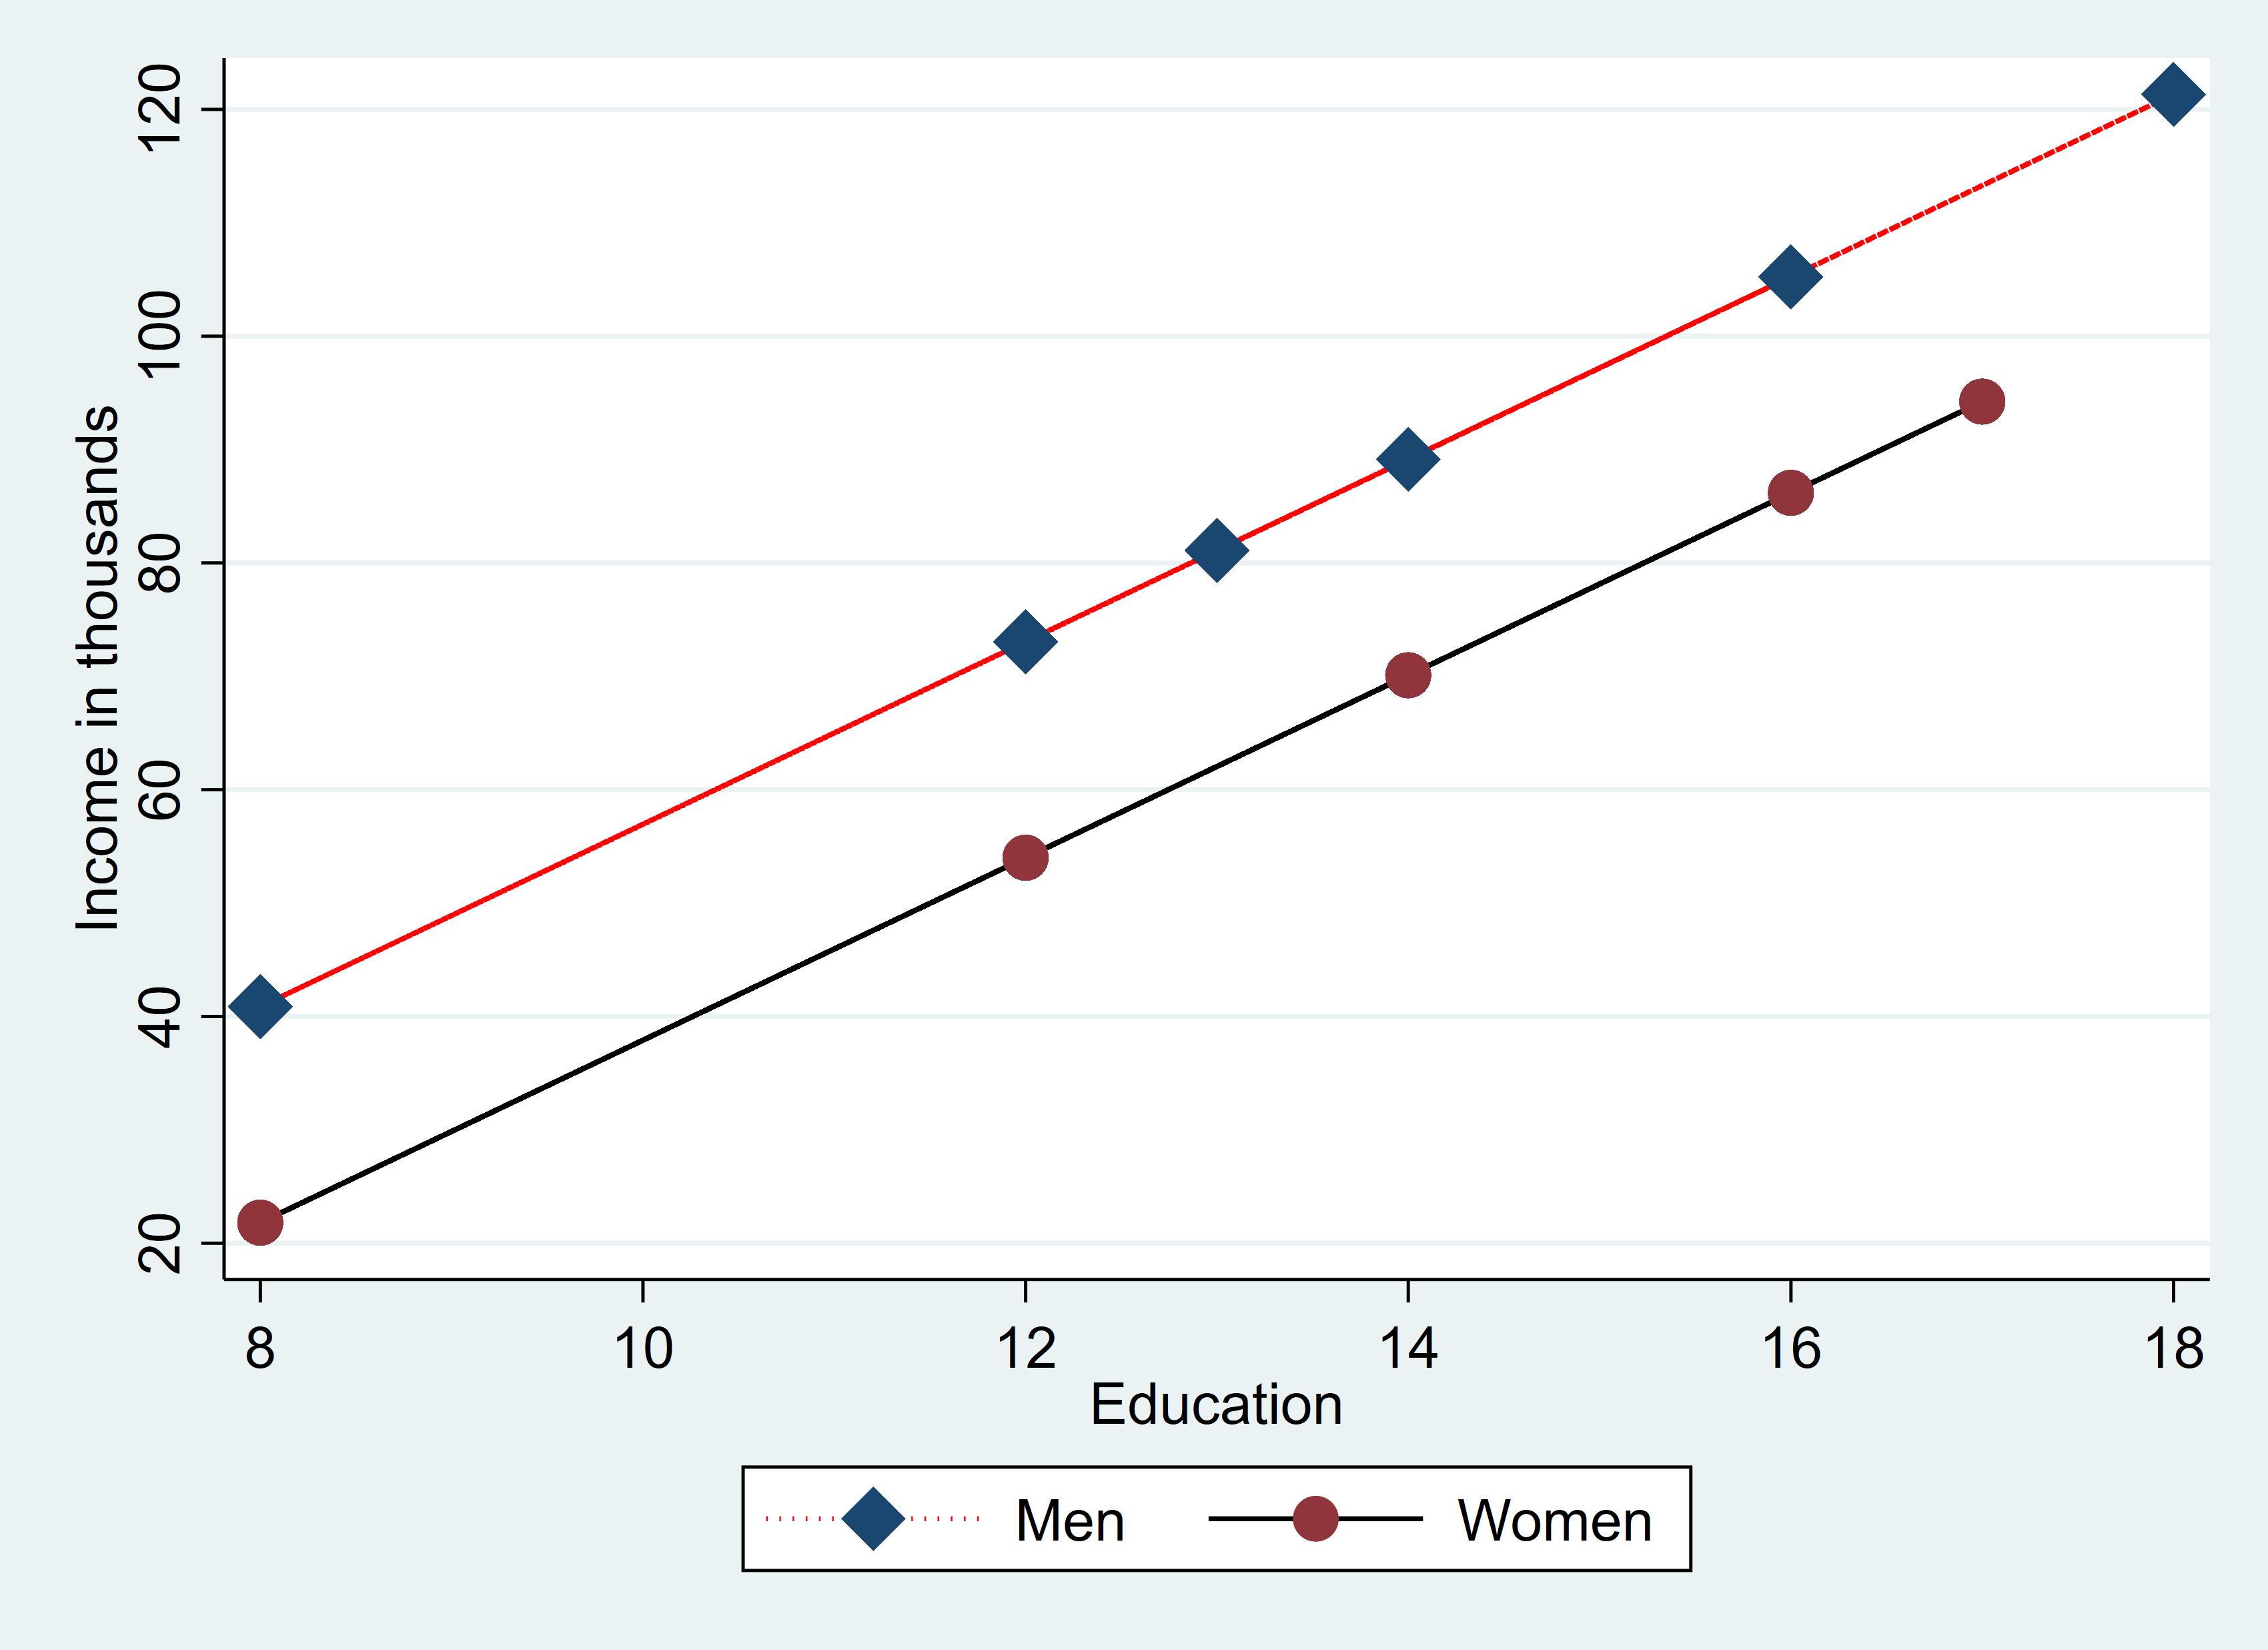

We see some differences between gender, but let's see if we can estimate it with interaction terms.

## Centering variables when transforming them
A conservative way of transforming variables it to center them. It is recommended to center the variables when using the interactions or transforming them. The way to center a variable is by subtracting mean of the variable from the values.

When you center variables, it makes the mean 0. In other words, the intercept (0) is basically the mean. Thus, positive values indicate "above the average" and negative values mean "below the average.

### There are two ways to do interactions in Stata
#### METHOD 1

In [26]:
use "http://www.stata-press.com/data/agis6/c10interaction", clear
*You can use the r(mean) command, but only if you use the summ command beforehand.
summarize educ
gen edu_cen= educ - r(mean)




    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        educ |        120       13.55    3.345259          8         18



In [27]:
gen educc_men=edu_cen*male

In [28]:
*You can use the # between variables
regress inc educ male educc_men


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.717         3  40868.2389   Prob > F        =    0.0000
    Residual |  135875.283       116  1171.33865   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531094    6.351628
        male |   19.17645   6.258121     3.06   0.003     6.781452    31.57145
   educc_men |   8.196445   1.885263     4.35   0.000     4.462444    11.93045
       _cons |   16.84834   19.07279     0.88   0.

In [29]:
*Here is the way folks generate an interaction without centering.
gen ed_men=educ*male
regress inc educ male ed_men




      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.719         3  40868.2397   Prob > F        =    0.0000
    Residual |  135875.281       116  1171.33863   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531092    6.351628
        male |  -91.88539   26.27242    -3.50   0.001    -143.9212   -39.84954
      ed_men |   8.196446   1.885263     4.35   0.000     4.462445    11.93045
       _cons |   16.84834   19.07279     0.88   

#### METHOD 2 (prefer method)

In [30]:
*You can use the # between variables
regress inc c.educ##i.male


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.719         3  40868.2397   Prob > F        =    0.0000
    Residual |  135875.281       116  1171.33863   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531092    6.351628
      1.male |  -91.88539   26.27242    -3.50   0.001    -143.9212   -39.84954
             |
 male#c.educ |
          1  |   8.196446   1.885263     4.35   0.000     4.462445    11.93045
             |
     

It is hard to interpret this value, so it is helpful to make equation for both male and female.

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

First, let's make the equation line for female so male=0.


<center>$income_i = 16.85 + 3.60*(educ_i) + (-91.86)*(0) + 8.20*(educ_i * 0)$
    
<center>$income_i = 16.85 + 3.60*(educ_i)$

Second, let's make the equation for male so male=1

<center>$income_i = 16.85 + 3.60*(educ_i) + (-91.86)*(1) + 8.20*(educ_i * 1)$
    
<center>$income_i = (16.85 -91.86) + (3.60 + 8.20)*(educ_i)$
    
<center>$income_i = -75.01 + 11.80*(educ_i)$

Now, we can compare the slopes for $(educ_i)$ between men and women. For women, the slope between educational years and income is 3.60. This means for each additional year of education there is a \\$3,600 increase in income. For men, the slope between educational years and income is 11.80. This means for each additional year of education there is a \\$11,800 increase in income. Stark difference!

### Margins command in Stata
The margins command is a easy way to graph these results in Stata. It is a postestimation command, so you have to regress first.

In [31]:
quietly regress inc c.educ##i.male
*When using the margins command, if there are numeric variables, you need to specify the values.
margins male , at (educ=(8(2)18))




Adjusted predictions                                       Number of obs = 120
Model VCE: OLS

Expression: Linear prediction, predict()
1._at: educ =  8
2._at: educ = 10
3._at: educ = 12
4._at: educ = 14
5._at: educ = 16
6._at: educ = 18

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    _at#male |
        1 0  |   45.66729    8.66112     5.27   0.000     28.51285    62.82173
        1 1  |   19.35346   8.545103     2.26   0.025      2.42881    36.27812
        2 0  |   52.87203   6.431252     8.22   0.000     40.13412    65.60993
        2 1  |   42.95109   6.496577     6.61   0.000      30.0838    55.81838
        3 0  |   60.07676   4.808436    12.49   0.000     50.55305    69.60048
        3 1  |   66.54872   4.940843    13.47   0.000     56.76276    76

<b>educ=8 and male =0</b>

<center>$income_i = 16.85 + 3.60*(8)$
    
<center>$income_i = 16.85 +28.8$
    
<center>$income_i = 45.65$

<b>educ=8 and male =1</b>

<center>$income_i = -75.01 + 11.80*(8)$

<center>$income_i = -75.01 + 94.4$
    
<center>$income_i = 19.39$

Stata will even make graphs based on margins estimates.

In [32]:
marginsplot
graph export "marginsplot_educ_male.png", replace width(3400)



Variables that uniquely identify margins: educ male

file C:/Users/acade/.stata_kernel_cache/graph2.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph2.pdf saved as PDF format

(file marginsplot_educ_male.png not found)
file marginsplot_educ_male.png saved as PNG format


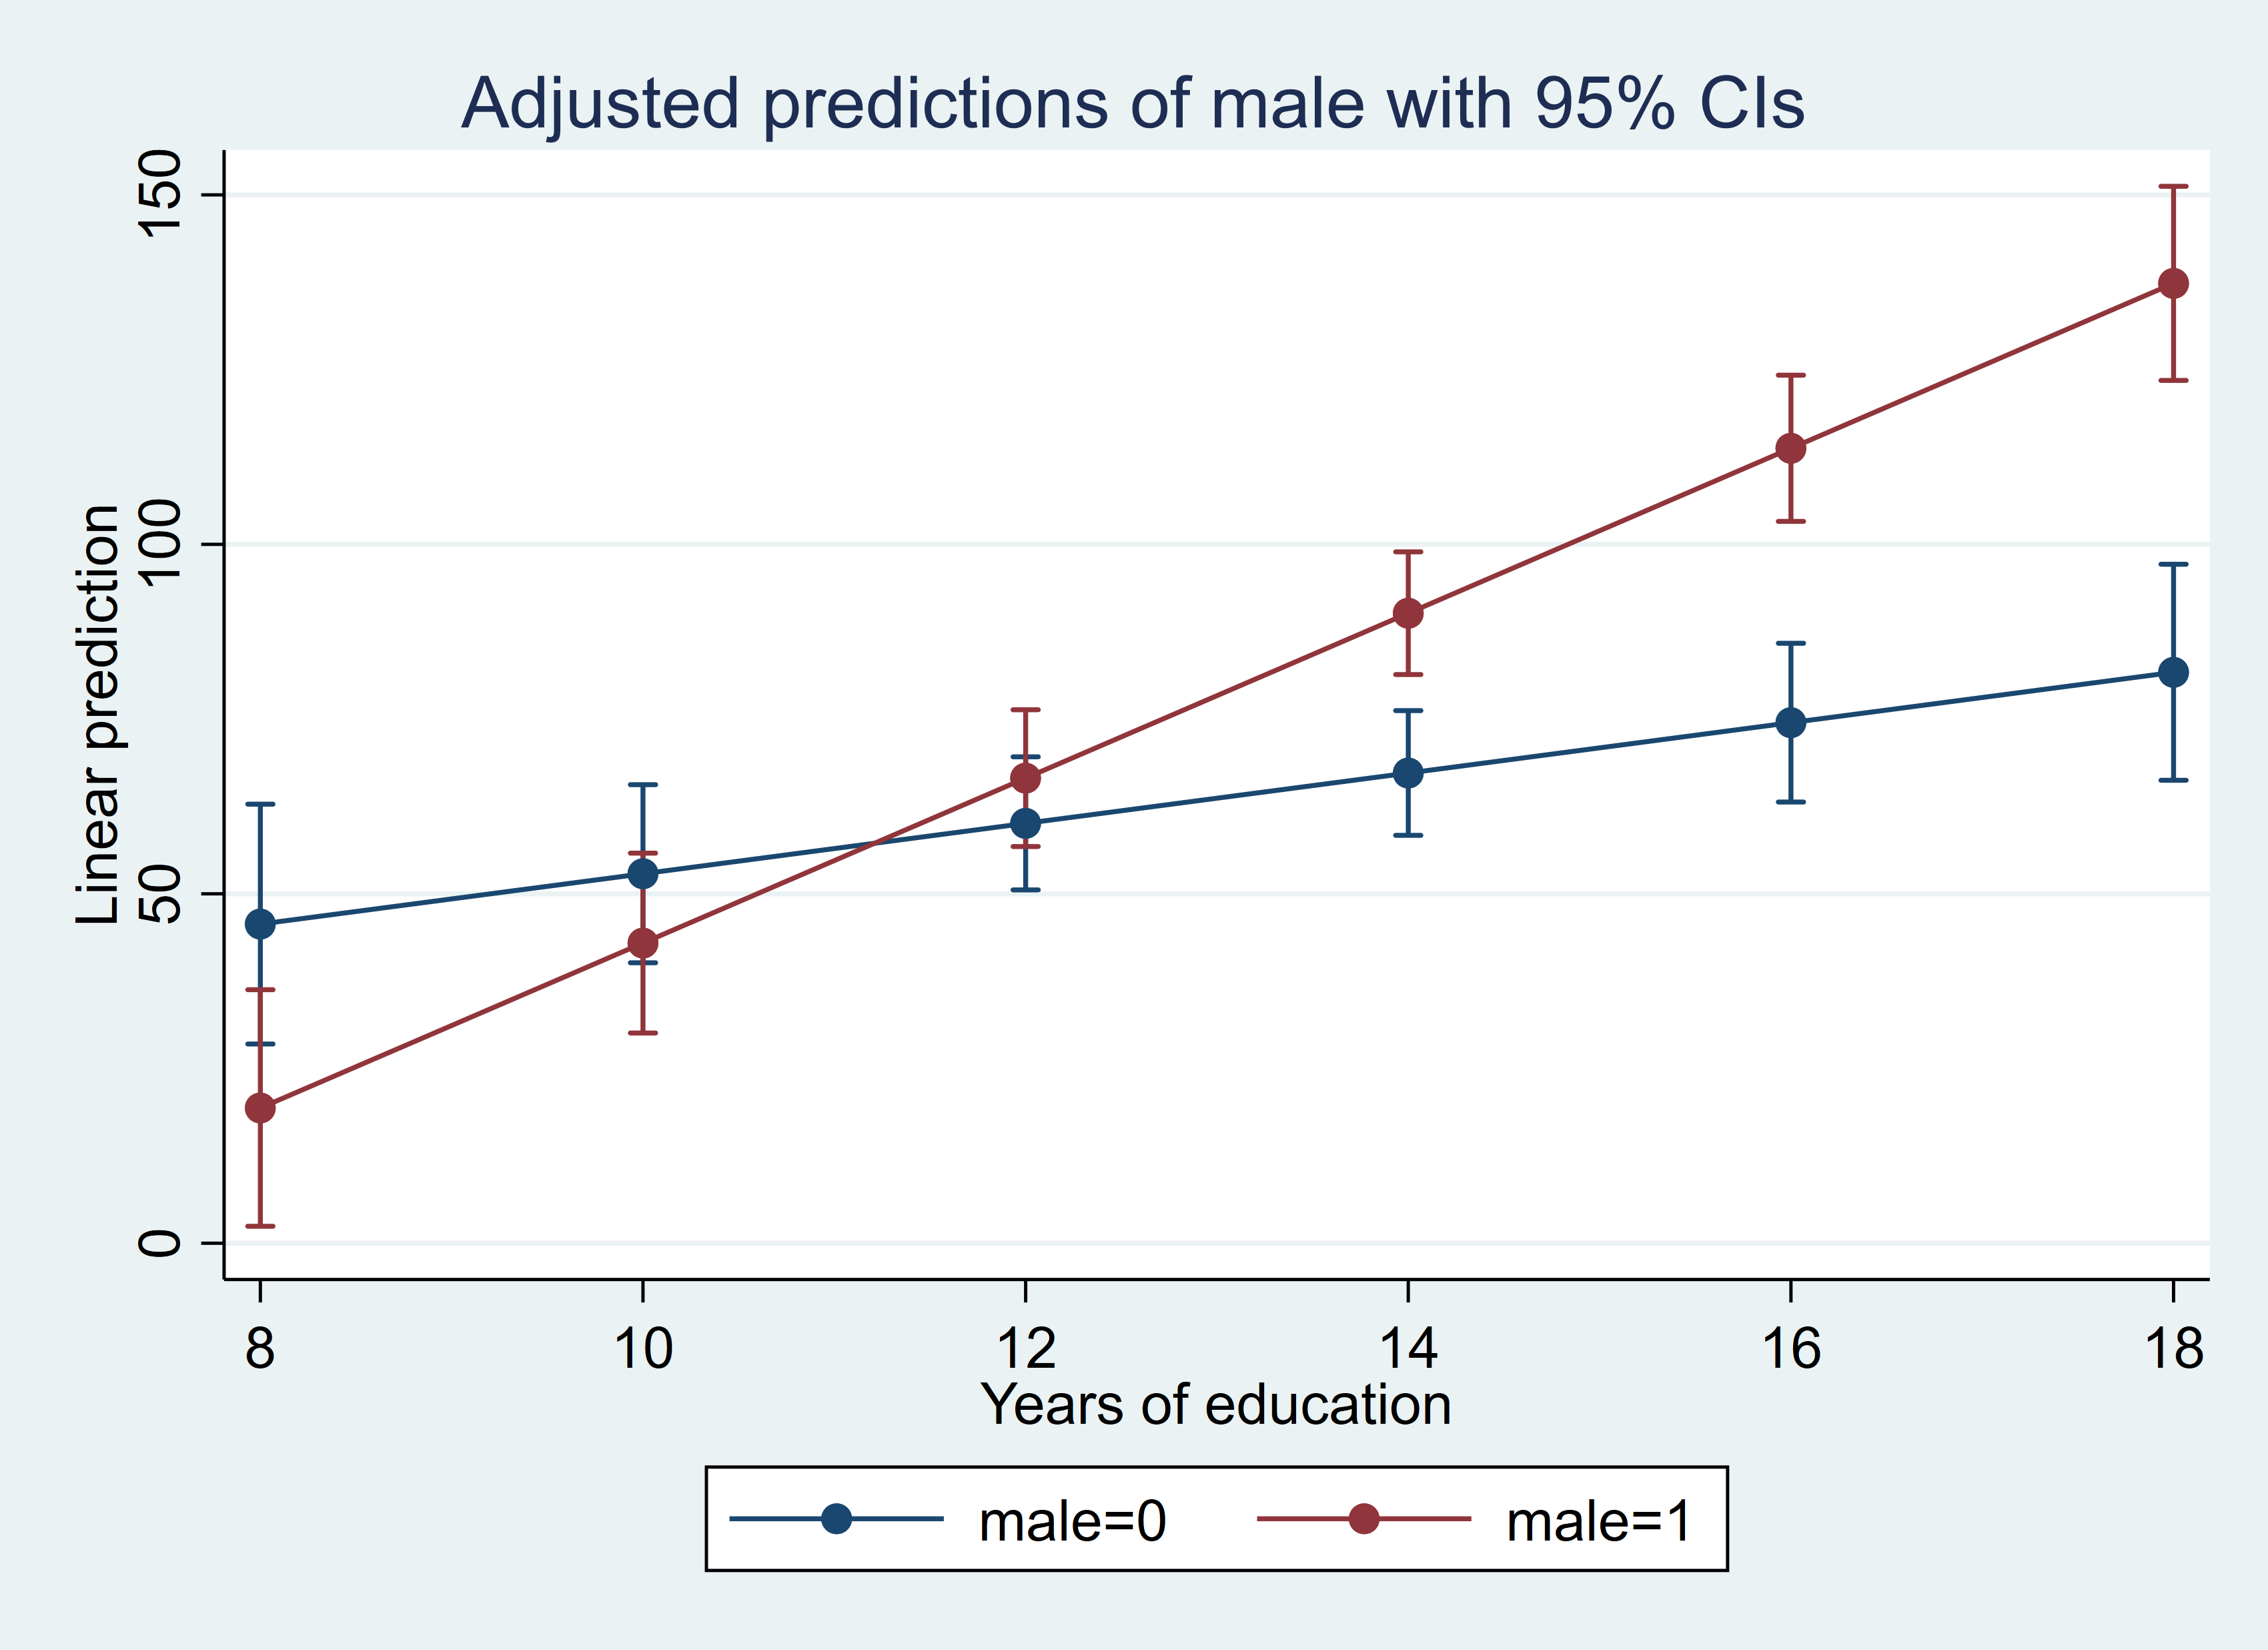

<i>The effect of educational attainment has on income is much stronger for men as compared to women.</i> This difference is statistically significant (see p-value of the interaction term in the regression output).

### What would have happened if we centered the variables?

In [33]:
use "http://www.stata-press.com/data/agis6/c10interaction", clear
*You can use the r(mean) command, but only if you use the summ command beforehand.
summarize educ
gen edu_cen= educ - r(mean)

gen educc_men=edu_cen*male

regress inc educ i.male educc_men




    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        educ |        120       13.55    3.345259          8         18




      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.717         3  40868.2389   Prob > F        =    0.0000
    Residual |  135875.283       116  1171.33865   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .853109

It is hard to interpret this value, so it is helpful to make equation for both male and female.

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

First, let's make the equation line for female so male=0.

<center>$income_i = 16.85 + 3.60*(educ_i) + (19.18)*(0) + 8.20*(educ_i * 0)$
    
<center>$income_i = 16.85 + 3.60*(educ_i)$

Second, let's make the equation for male so male=1

<center>$income_i = 16.85 + 3.60*(educ_i) + (19.18)*(1) + 8.20*(educ_i * 1)$
    
<center>$income_i = (16.85 +19.18) + (3.60 + 8.20)*(educ_i)$
    
<center>$income_i = 36.03 + 11.8*(educ_i)$

SAME SLOPES AS BEFORE. Women's slope is still 3.60. Men's slope is still 11.80. Only the intercept changes

In [35]:
twoway ///
    function y=36.03+11.8*x, color(red) lpattern(dash) ///
    || function y=16.85+3.6*x, color(black) ///
    || function y=-75.01+11.80*x, color(green) lpattern(dash) ///
    || function y=16.85+3.6*x, color(orange) 
graph export "comparinglines.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph4.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph4.pdf saved as PDF format

file comparinglines.png saved as PNG format


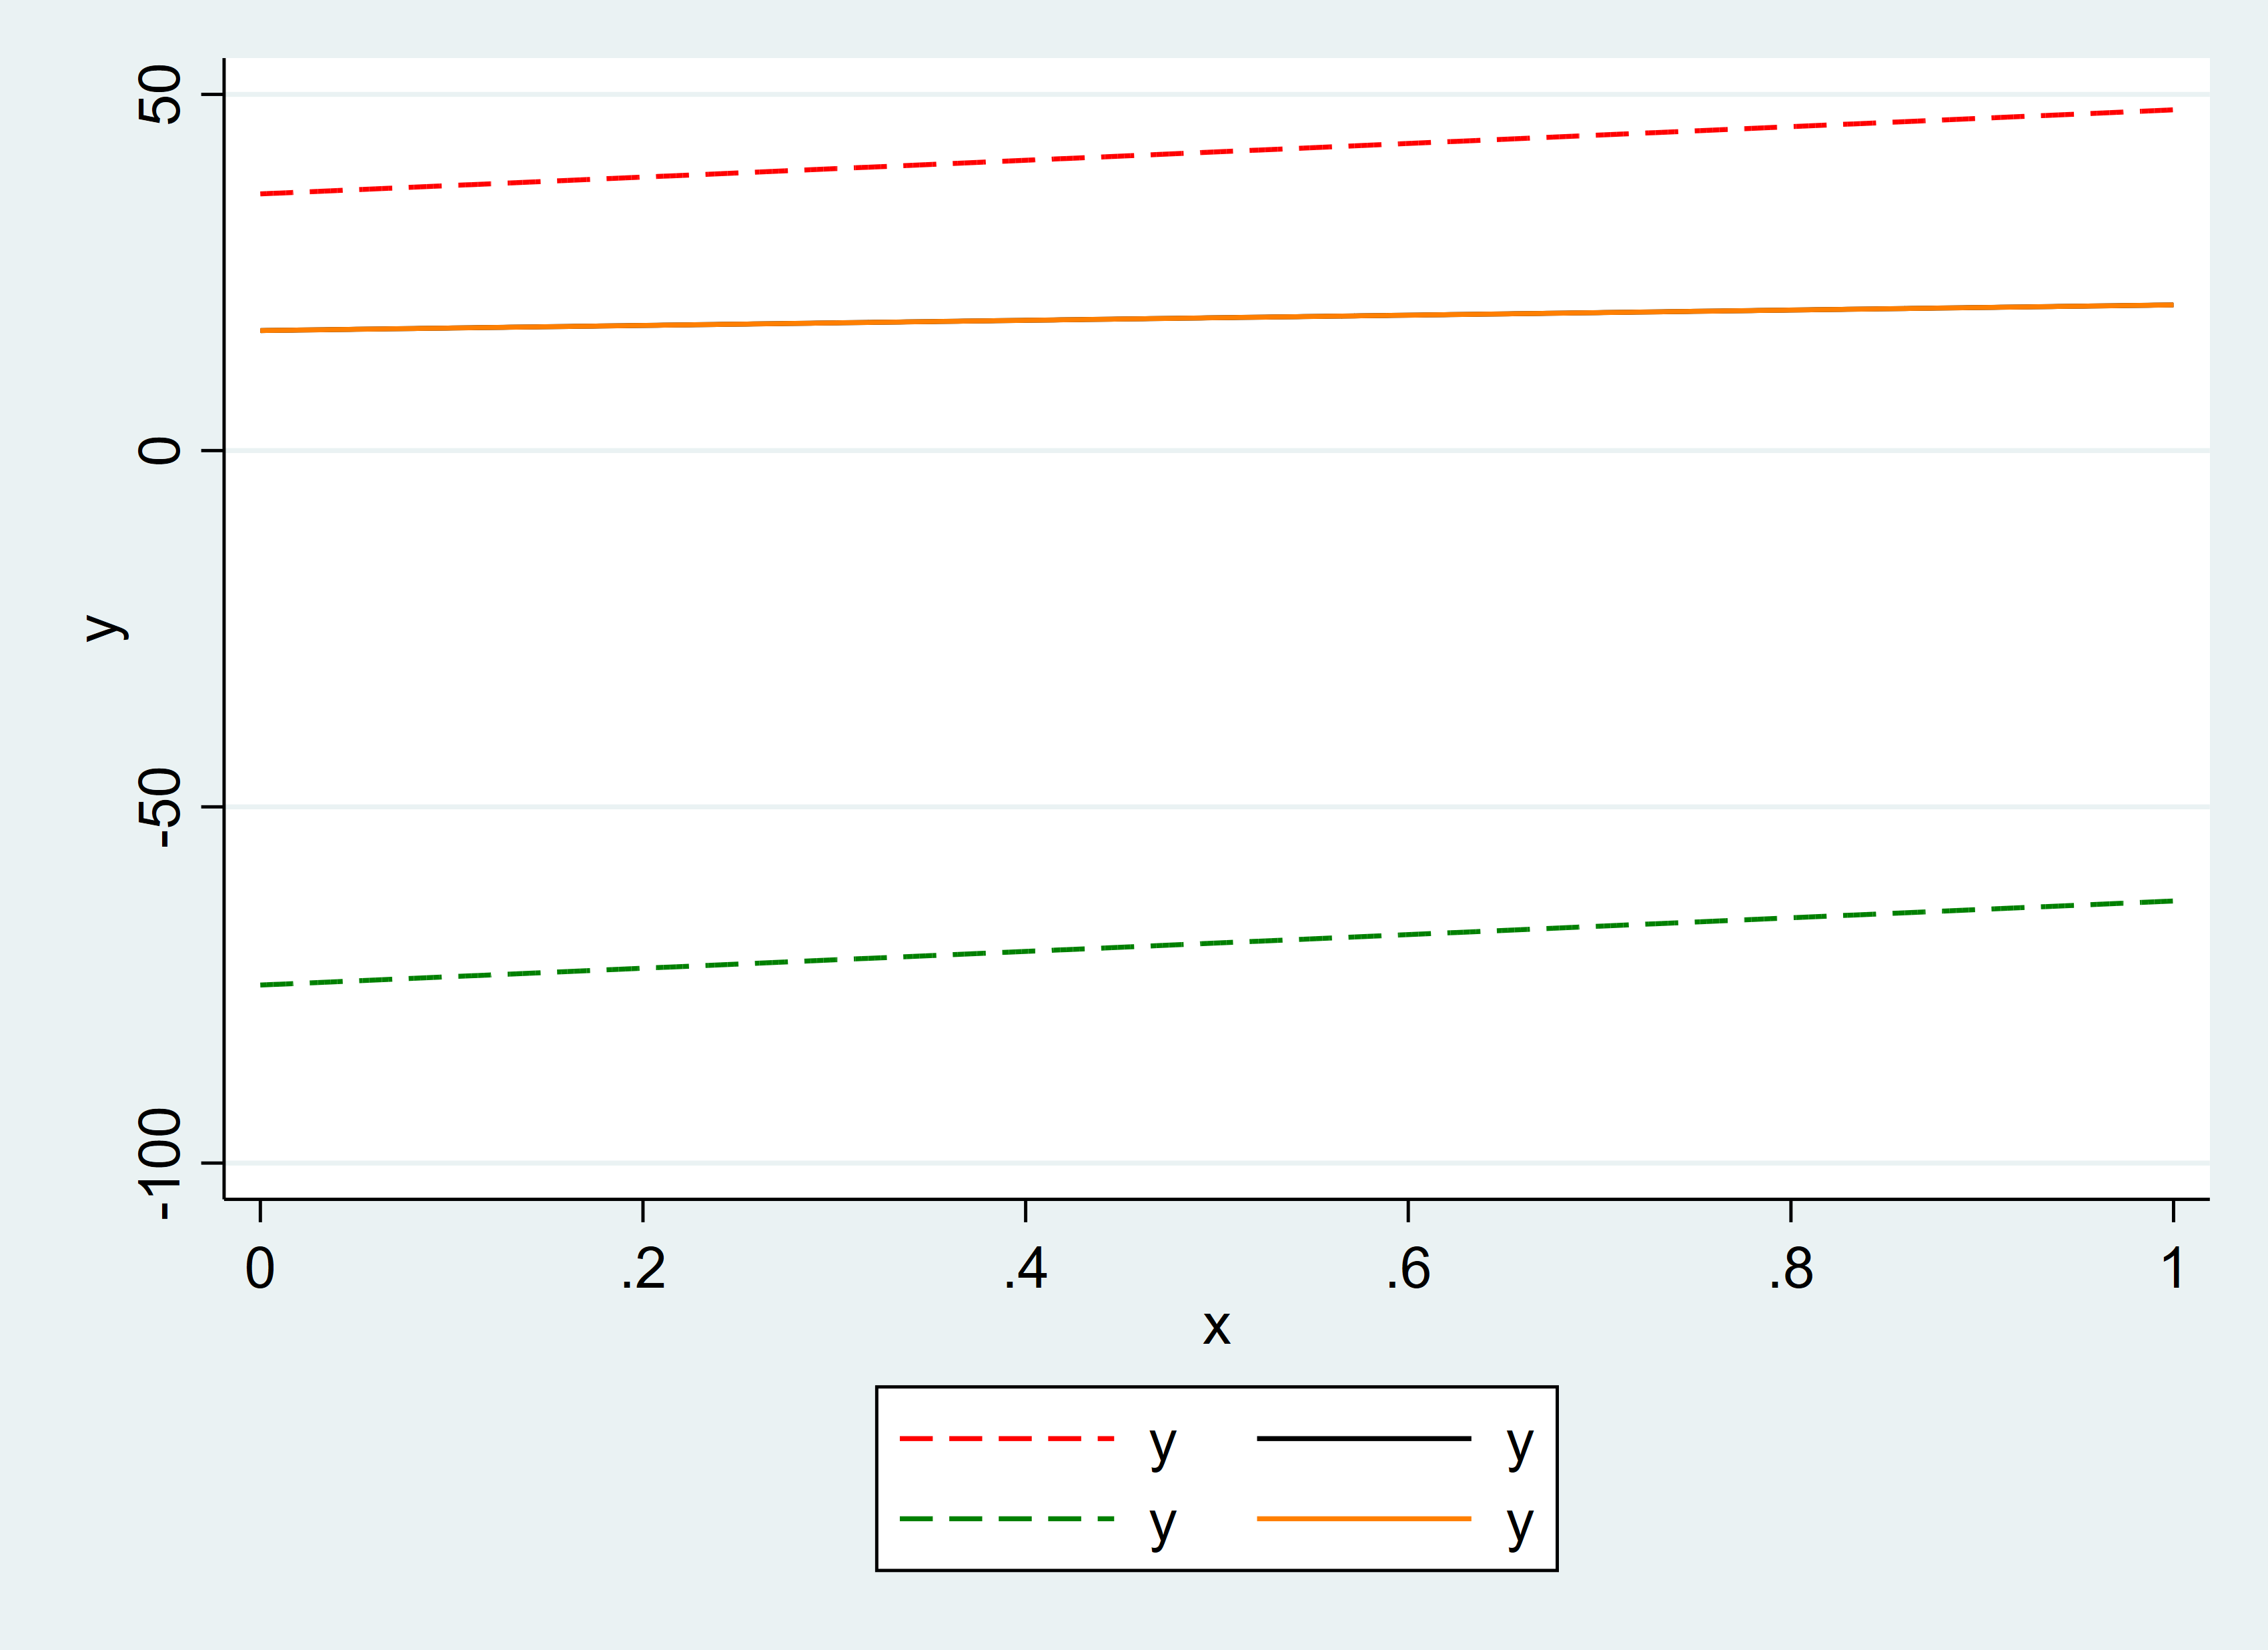

Here, the dash lines are male equations. The red dash line is from the centered equation. The female lines are equivalent. 

## Interactions between two numeric variables

Let's say, we want to fit a model predicting bmi across independent variables age, vitamin c, gender, and region.
    
<b>Additive model:</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(female_i)+\beta_4*(mw_i)+\beta_5*(s_i)+\beta_6*(w_i)$

Let's say we think the effect of vitamin c intake changes the relationship between age to bmi

<b>Interaction model:</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(age_ixvitaminc_i)+\beta_4*(female_i)+\beta_5*(mw_i)+\beta_6*(s_i)+\beta_7*(w_i)$

In [36]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
summ vitaminc, detail
codebook vitaminc




                   Serum vitamin C (mg/dL)
-------------------------------------------------------------
      Percentiles      Smallest
 1%           .2             .1
 5%           .3             .1
10%           .3             .1       Obs               9,973
25%           .6             .1       Sum of wgt.       9,973

50%            1                      Mean           1.034814
                        Largest       Std. dev.      .5813791
75%          1.4            8.3
90%          1.7            9.4       Variance       .3380017
95%          1.9           13.9       Skewness       4.539869
99%          2.4           18.1       Kurtosis       108.2617


--------------------------------------------------------------------------------
vitaminc                                                 Serum vitamin C (mg/dL)
--------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.1,18.1]         

In [37]:
regress bmi age vitaminc i.female i.region


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(6, 9966)      =     68.34
       Model |  9515.65877         6  1585.94313   Prob > F        =    0.0000
    Residual |  231262.471     9,966  23.2051446   R-squared       =    0.0395
-------------+----------------------------------   Adj R-squared   =    0.0389
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8172

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0524663   .0028167    18.63   0.000     .0469449    .0579877
    vitaminc |  -.8312809   .0862732    -9.64   0.000    -1.000394   -.6621679
             |
      female |
     Female  |   .1901829   .0983902     1.93   0.053    -.0026818    .3830475
             |
     

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(female_i)+\beta_4*(mw_i)+\beta_5*(s_i)+\beta_6*(w_i)$

<center>$(bmi_i)=23.90+.05*(age_i)+(-.83)*(vitaminc_i)+.19*(female_i)+(-.08)*(mw_i)+(-.20)*(s_i)+(-.15)*(w_i)$

In [38]:
regress bmi c.age##c.vitaminc i.female i.region


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(7, 9965)      =     63.61
       Model |  10298.9223         7  1471.27461   Prob > F        =    0.0000
    Residual |  230479.207     9,965  23.1288718   R-squared       =    0.0428
-------------+----------------------------------   Adj R-squared   =    0.0421
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8092

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0220407   .0059366     3.71   0.000     .0104038    .0336777
    vitaminc |  -2.331426   .2717928    -8.58   0.000    -2.864194   -1.798657
             |
       c.age#|
  c.vitaminc |    .029107   .0050017     5.82   0.000     .0193026    .0389115
             |
     

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(age_ixvitaminc_i)+\beta_4*(female_i)+\beta_5*(mw_i)+\beta_6*(s_i)+\beta_7*(w_i)$

<center>$(bmi_i)=25.46+.02*(age_i)+(-2.33)*(vitaminc_i)+.03*(age_ixvitaminc_i)+.19*(female_i)+(-.09)*(mw_i)+(-.21)*(s_i)+(-.16)*(w_i)$

The interaction is positive generally telling us as vitamin c intake increases and age increase, there is a generally an increase to bmi.

In [39]:
regress, coeflegend


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(7, 9965)      =     63.61
       Model |  10298.9223         7  1471.27461   Prob > F        =    0.0000
    Residual |  230479.207     9,965  23.1288718   R-squared       =    0.0428
-------------+----------------------------------   Adj R-squared   =    0.0421
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8092

------------------------------------------------------------------------------
         bmi | Coefficient  Legend
-------------+----------------------------------------------------------------
         age |   .0220407  _b[age]
    vitaminc |  -2.331426  _b[vitaminc]
             |
       c.age#|
  c.vitaminc |    .029107  _b[c.age#c.vitaminc]
             |
      female |
     Female  |   .1858965  _b[1.female]
             |
      region |
         MW  |  -.0936871  _b[2.region]
          S  |  -.2137082  _b[3.region

In [40]:
*This calculates the predicted values with specific age and vitamin c values AND other variables are at average.
margins , at(age=(20(25)70) vitaminc=(.2(.6)2)) atmeans vsquish


Adjusted predictions                                     Number of obs = 9,973
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  age      =       20
        vitaminc =       .2
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
2._at:  age      =       20
        vitaminc =       .8
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
3._at:  age      =       20
        vitaminc =      1.4
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
4._at:  age      =       20
        vitaminc =        2
        0

In [41]:
marginsplot, x(age)
graph export "vitaminc_age.png", replace width(3400)



Variables that uniquely identify margins: age vitaminc

file C:/Users/acade/.stata_kernel_cache/graph5.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph5.pdf saved as PDF format

(file vitaminc_age.png not found)
file vitaminc_age.png saved as PNG format


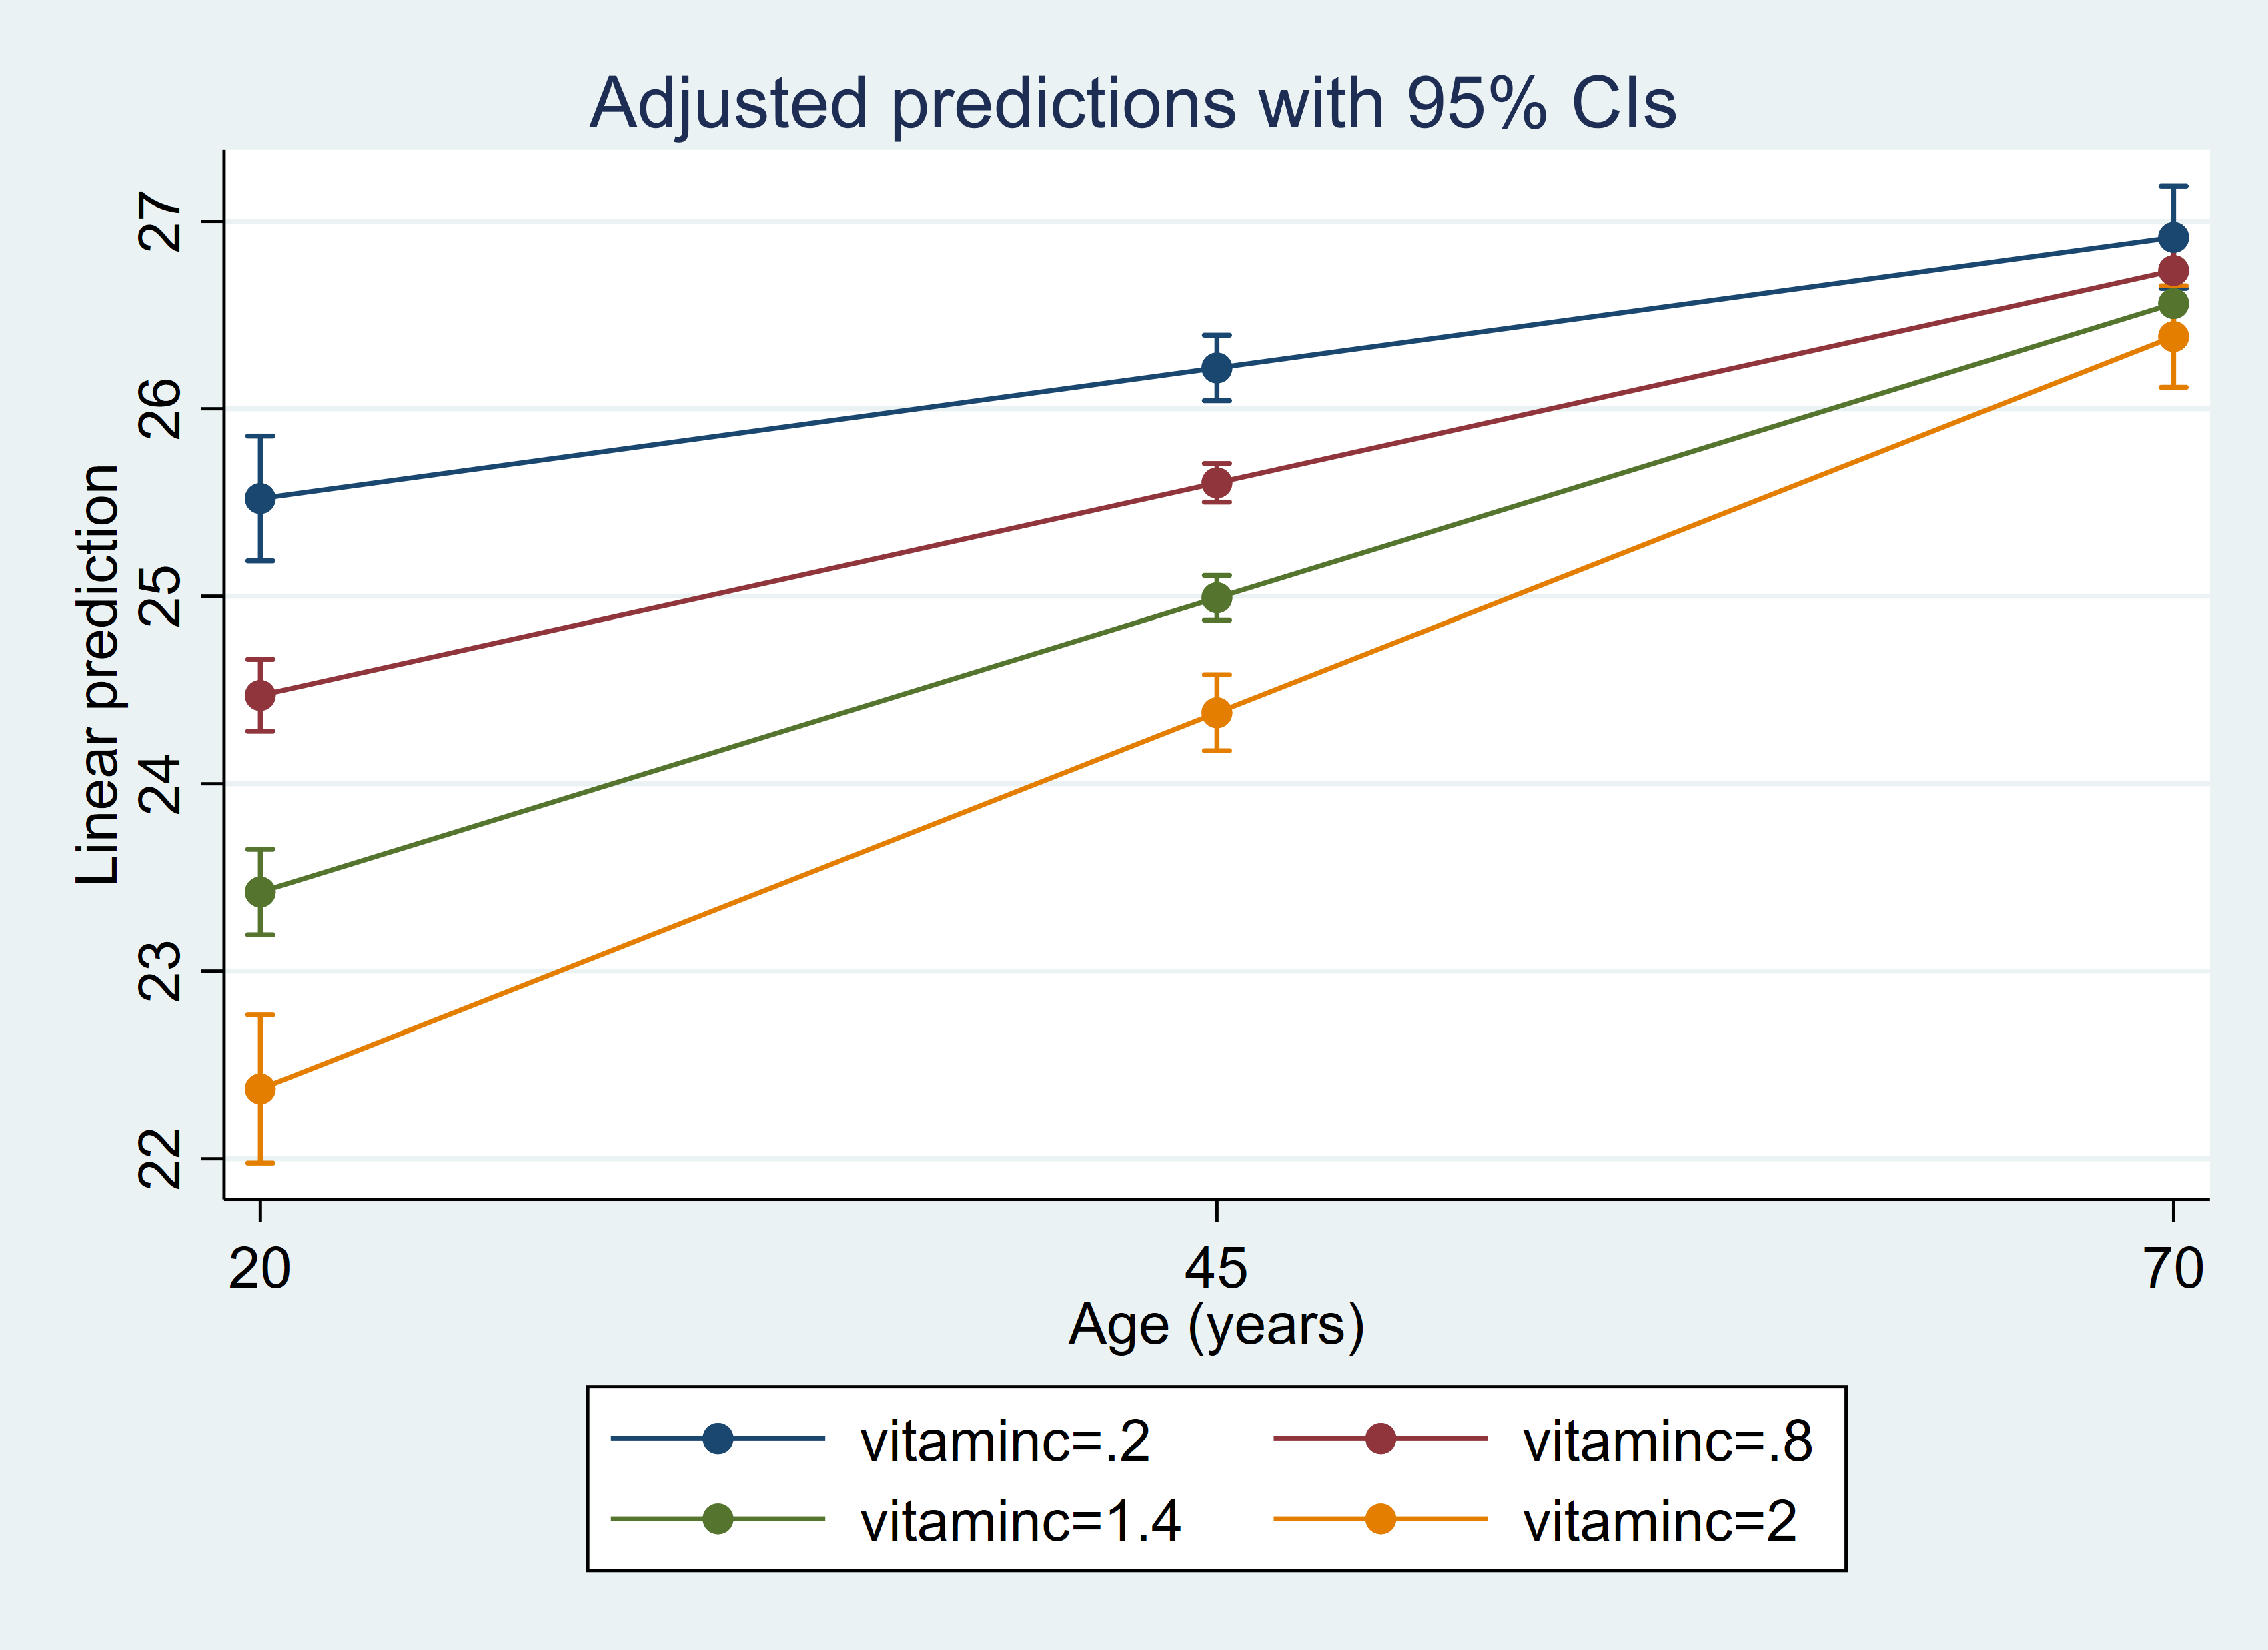

We can see the effect of age on bmi is strongest as vitamin c intake increases. Fro example, we see the slope between age and bmi gets steeper as vitamin c intake increases. This relationship is statistically significant.

# Practice
## Interactions between two categorical variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta). Use the "codebook" command to find out the categories of rural and female.
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, and age. Write out an equation with the estimated beta coefficients from the regression output.
* Q3: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, age, and an interaction between rural and female. Write out the four equations with the estimated beta coefficients from the regression output. For example, female=0, rural=0; female=1, rural=0; female=0, rural=1; female=1, rural=1.
* Q4: What is the average age?
* Q5: Use the margins command to make a graph comparing the interactions. Make sure to use the average of age as the control. Plot the margins results.
* Q6: Write a sentence summarizing the results of the interaction.

## Interactions between a categorical and numeric variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta).
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, age, and an interaction between age and female. Write out the two equations with the estimated beta coefficients from the regression output. For example, female=0; female=1.
* Q3: What is the minimum, and maximum of age?
* Q4: Based on the min and max, decide a interval to use for the margins command. Use the margins command to make a graph comparing the interactions. Plot the margins results.
* Q5: Write a sentence summarizing the results of the interaction.

## Interactions between two numeric variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta). Use the "codebook" command for tcresult.
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: tcresult, female, and age. Write out an equation with the estimated beta coefficients from the regression output.
* Q3: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: tcresult, female, age, and an interaction between age and tcresult. 
* Q3: What is the minimum, and maximum of age and tcresult?
* Q4: Based on the min and max, decide intervals to use for the margins command. Use the margins command to make a graph comparing the interactions. Plot the margins results.
* Q5: Write a sentence summarizing the results of the interaction.

answers below

Interactions between two categorical variables.

In [48]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear

In [49]:
codebook rural female


--------------------------------------------------------------------------------
rural                                                                      Rural
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: rurallbl

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/10,351

            Tabulation: Freq.   Numeric  Label
                        6,548         0  Urban
                        3,803         1  Rural

--------------------------------------------------------------------------------
female                                                                    Female
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: female

                 Range: [0,1]                         Units: 1
         Unique values: 2   

In [44]:
regress bmi i.rural i.female age


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(3, 10347)     =    105.56
       Model |  7424.69497         3  2474.89832   Prob > F        =    0.0000
    Residual |  242599.467    10,347  23.4463581   R-squared       =    0.0297
-------------+----------------------------------   Adj R-squared   =    0.0294
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.8421

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       rural |
      Rural  |   .1978055   .0989421     2.00   0.046       .00386    .3917511
             |
      female |
     Female  |   .0447619     .09537     0.47   0.639    -.1421818    .2317055
         age |   .0485505   .0027694    17.53   0.000     .0431219    .0539791
     

<center>$(bmi_i)=\beta_0+\beta_1*(rural_i)+\beta_2*(female_i)+\beta_3*(age_i)$
    
<center>$(bmi_i)=23.131+0.198*(rural_i)+0.045*(female_i)+0.0486*(age_i)$

In [46]:
regress bmi age i.rural##i.female


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(4, 10346)     =     79.16
       Model |  7424.79692         4  1856.19923   Prob > F        =    0.0000
    Residual |  242599.365    10,346  23.4486145   R-squared       =    0.0297
-------------+----------------------------------   Adj R-squared   =    0.0293
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.8424

-------------------------------------------------------------------------------
          bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
          age |   .0485474   .0027699    17.53   0.000     .0431178    .0539771
              |
        rural |
       Rural  |   .2045342   .1421413     1.44   0.150    -.0740903    .4831587
              |
       female |
      Female  |     .04957   .1200572     0.41   0.680    -.

<center>$(bmi_i)=\beta_0+\beta_1*(rural_i)+\beta_2*(female_i)+\beta_3*(age_i)+\beta_4*(ruralXfemlae_i)$
    
<center>$(bmi_i)=23.129+0.205*(rural_i)+0.050*(female_i)+0.0486*(age_i)-0.013*(ruralXfemlae_i)$

<b> female=0, rural=0</b>
<center>$(bmi_i)=23.129+0.205*(0)+0.050*(0)+0.0486*(age_i)-0.013*(0x0)$
    
<center>$(bmi_i)=23.129+0.0486*(age_i)$
    
<b>female=1, rural=0</b>

<center>$(bmi_i)=23.129+0.205*(0)+0.050*(1)+0.0486*(age_i)-0.013*(0X1)$
<center>$(bmi_i)=23.179+0.0486*(age_i)$
        
<b>female=0, rural=1</b>

<center>$(bmi_i)=23.129+0.205*(1)+0.050*(0)+0.0486*(age_i)-0.013*(1X0)$
<center>$(bmi_i)=23.334+0.0486*(age_i)$

<b>female=1, rural=1</b>
<center>$(bmi_i)=23.129+0.205*(1)+0.050*(1)+0.0486*(age_i)-0.013*(1X1)$
<center>$(bmi_i)=23.371+0.0486*(age_i)$

In [67]:
summ age


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74


In [47]:
*The margins command helps calculate estiamtes for interactions
margins rural#female, at(age=47.57965)
marginsplot, noci
graph export "marginsplot_bmi_female_rural.png", replace width(3400)



Adjusted predictions                                    Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
At: age = 47.57965

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
 rural#female |
  Urban#Male  |   25.43883   .0881325   288.64   0.000     25.26607    25.61158
Urban#Female  |    25.4884    .081567   312.48   0.000     25.32851    25.64828
  Rural#Male  |   25.64336   .1114012   230.19   0.000     25.42499    25.86173
Rural#Female  |    25.6799   .1108129   231.74   0.000     25.46268    25.89711
-------------------------------------------------------------------------------


Variables that uniquely identify margins: rural female

file C:/Users/acade/.stata_kernel_cache/graph6.svg saved as SVG format
file C:/Users/aca

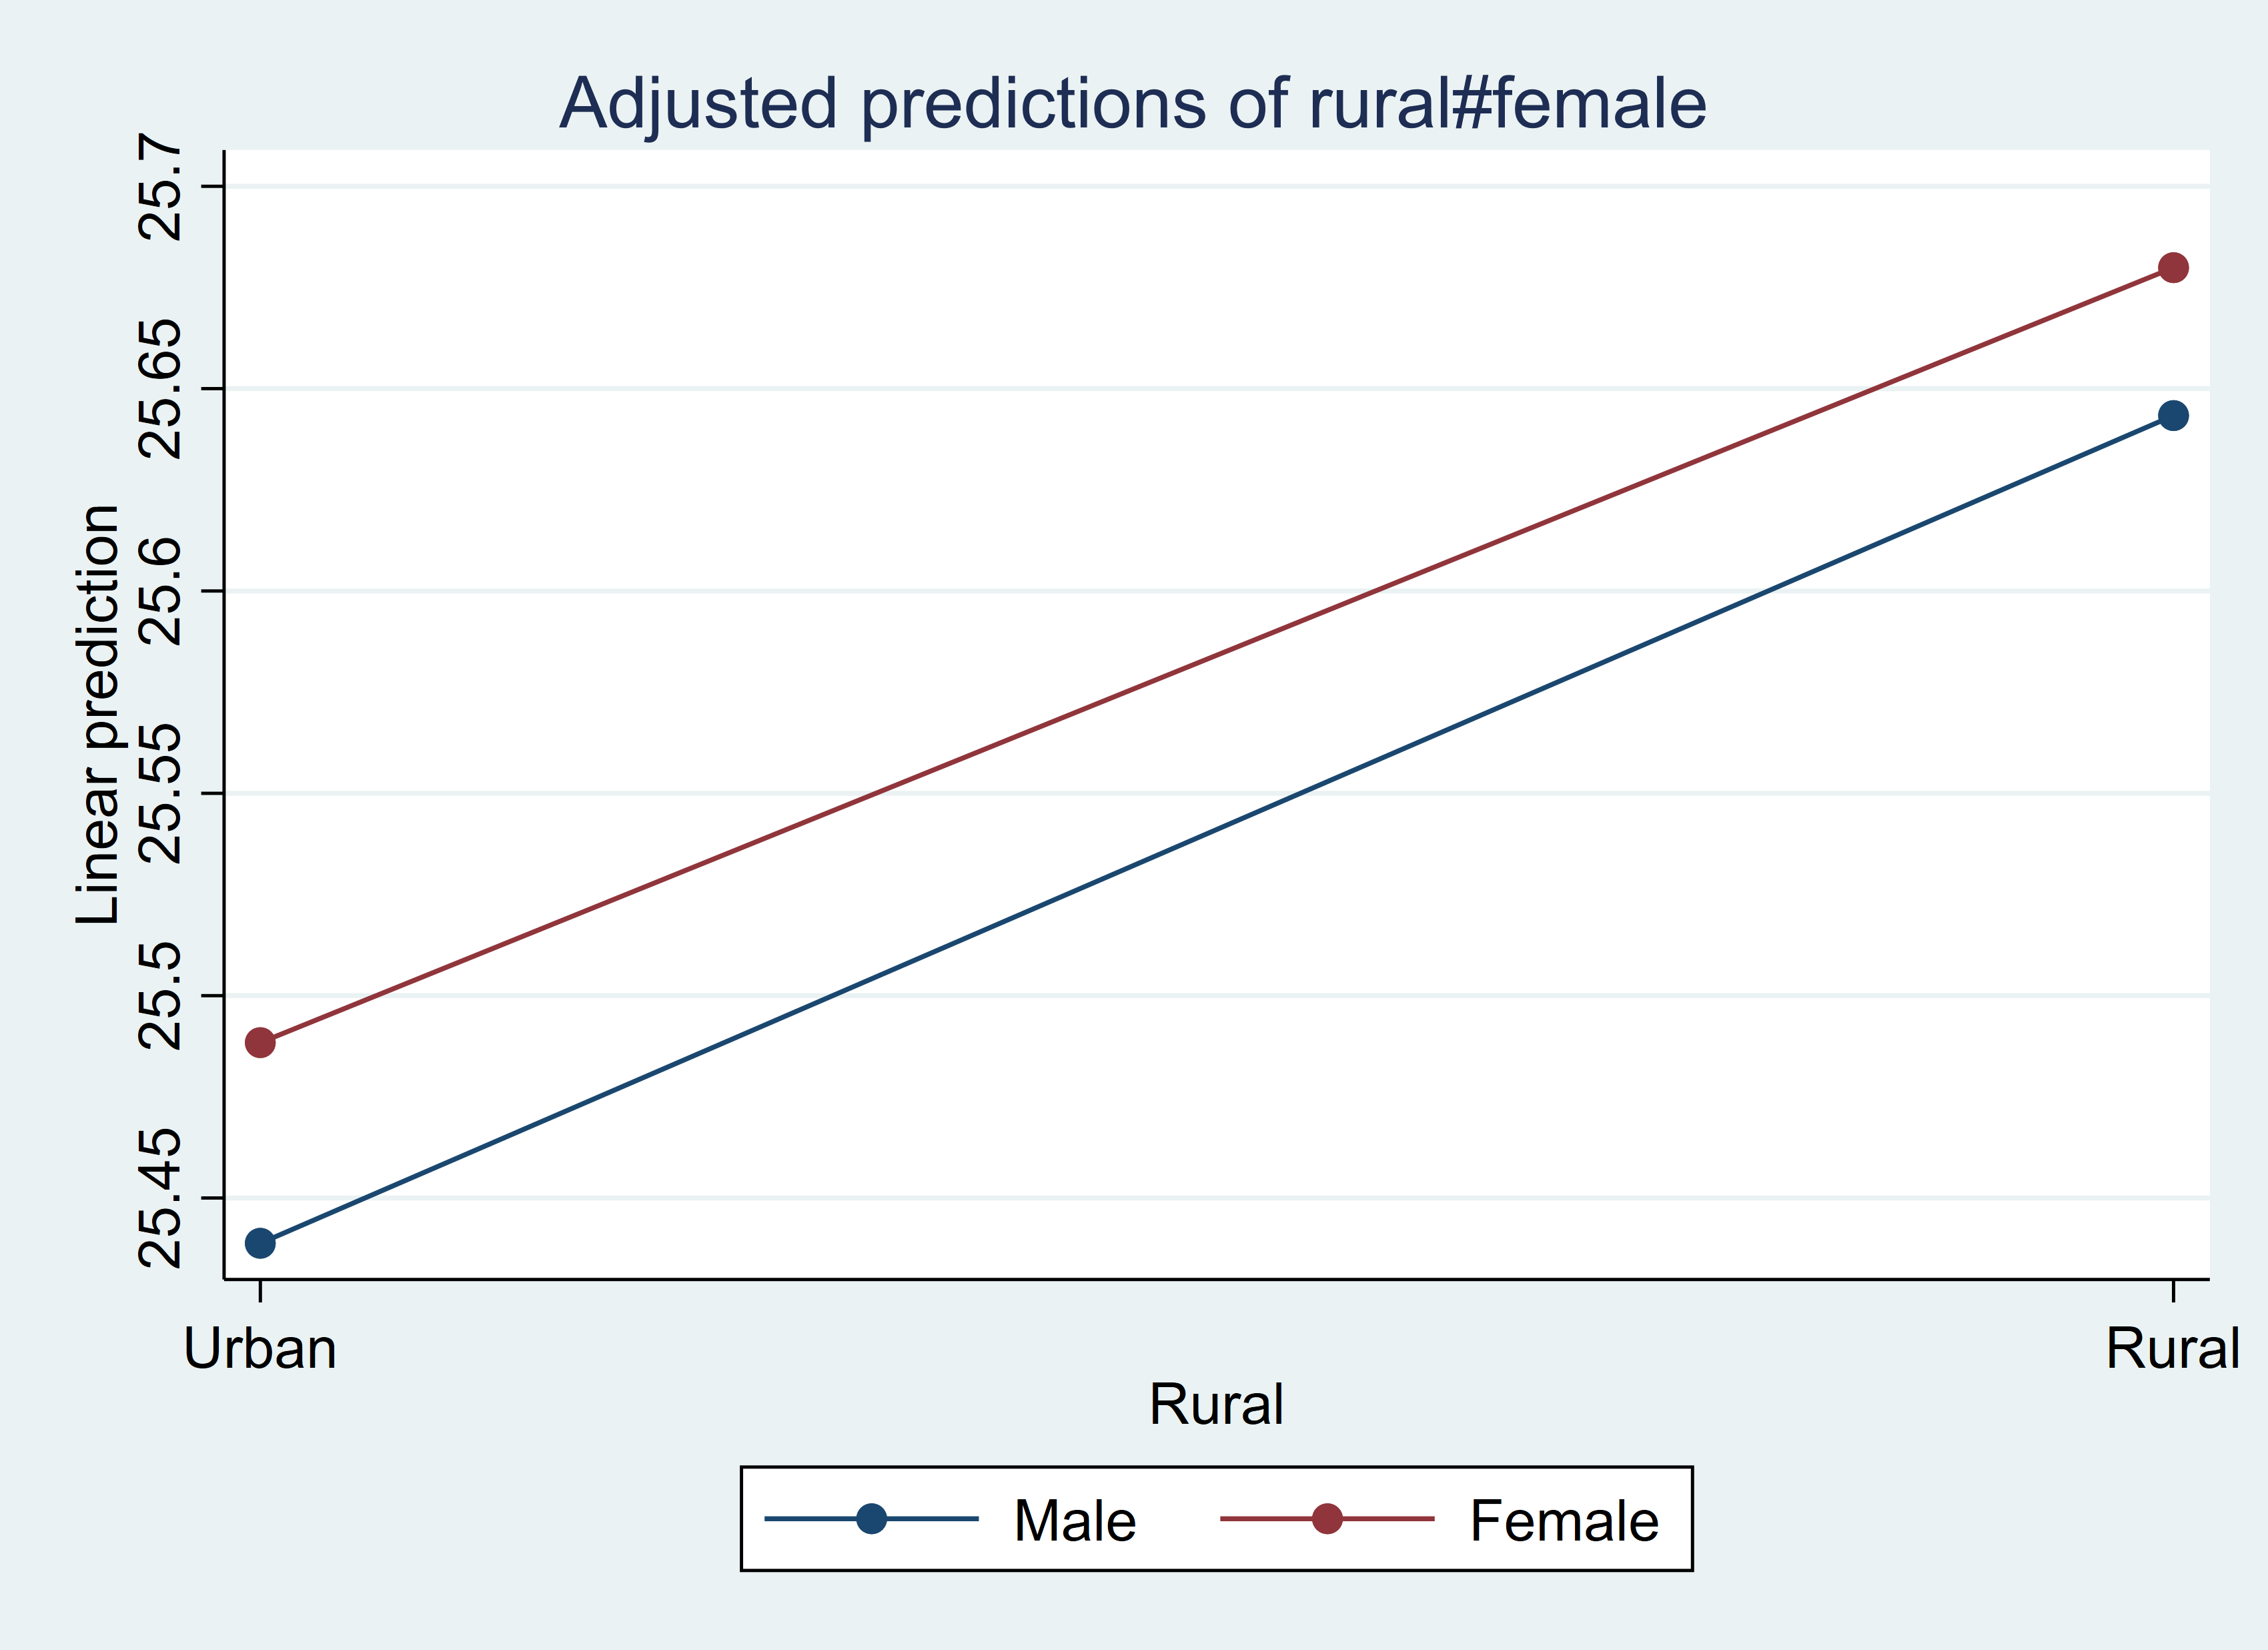

There is not a statistical significant (p=.947) difference between female and rural for BMI.

Interactions between a categorical and numeric variables.

In [68]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear

In [69]:
regress bmi i.rural i.female##c.age


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(4, 10346)     =     96.62
       Model |  9003.71326         4  2250.92831   Prob > F        =    0.0000
    Residual |  241020.449    10,346  23.2960032   R-squared       =    0.0360
-------------+----------------------------------   Adj R-squared   =    0.0356
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.8266

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       rural |
      Rural  |   .2123749   .0986402     2.15   0.031     .0190211    .4057287
             |
      female |
     Female  |  -2.116887   .2792419    -7.58   0.000    -2.664255   -1.569519
         age |   .0245371    .004016     6.11   0.000     .0166651    .0324092
     

<center>$(bmi_i)=\beta_0+\beta_1*(rural_i)+\beta_2*(female_i)+\beta_3*(age_i)+\beta_4*(femaleXage_i)$
    
<center>$(bmi_i)=24.265+0.212*(rural_i)-2.117*(female_i)+0.0245*(age_i)+0.045*(femaleXage_i)$
    
<b> female =1

<center>$(bmi_i)=24.265+0.212*(rural_i)-2.117*(1)+0.0245*(age_i)+0.045*(1Xage_i)$
<center>$(bmi_i)=22.148+0.212*(rural_i)-2.117*(1)+0.0695*(age_i)$    
    
<b> female=0
    
<center>$(bmi_i)=24.265+0.212*(rural_i)-2.117*(0)+0.0245*(age_i)+0.045*(0Xage_i)$
<center>$(bmi_i)=22.148+0.212*(rural_i)+0.0245*(age_i)$    

In [54]:
summ age


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74


In [57]:
margins female, at (age=(20(5)75))
marginsplot
graph export "marginsplot_bmi_female_age.png", replace width(3400)



Predictive margins                                      Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  age = 20
2._at:  age = 25
3._at:  age = 30
4._at:  age = 35
5._at:  age = 40
6._at:  age = 45
7._at:  age = 50
8._at:  age = 55
9._at:  age = 60
10._at: age = 65
11._at: age = 70
12._at: age = 75

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  _at#female |
     1#Male  |   24.83337   .1298158   191.30   0.000      24.5789    25.08783
   1#Female  |   23.62563    .123963   190.59   0.000     23.38264    23.86862
     2#Male  |   24.95605   .1132964   220.27   0.000     24.73397    25.17814
   2#Female  |   23.97561   .1083147   221.35   0.000     23.76329    24.18792
     3#Male  |   25.07874   .0981142   255.61   0.

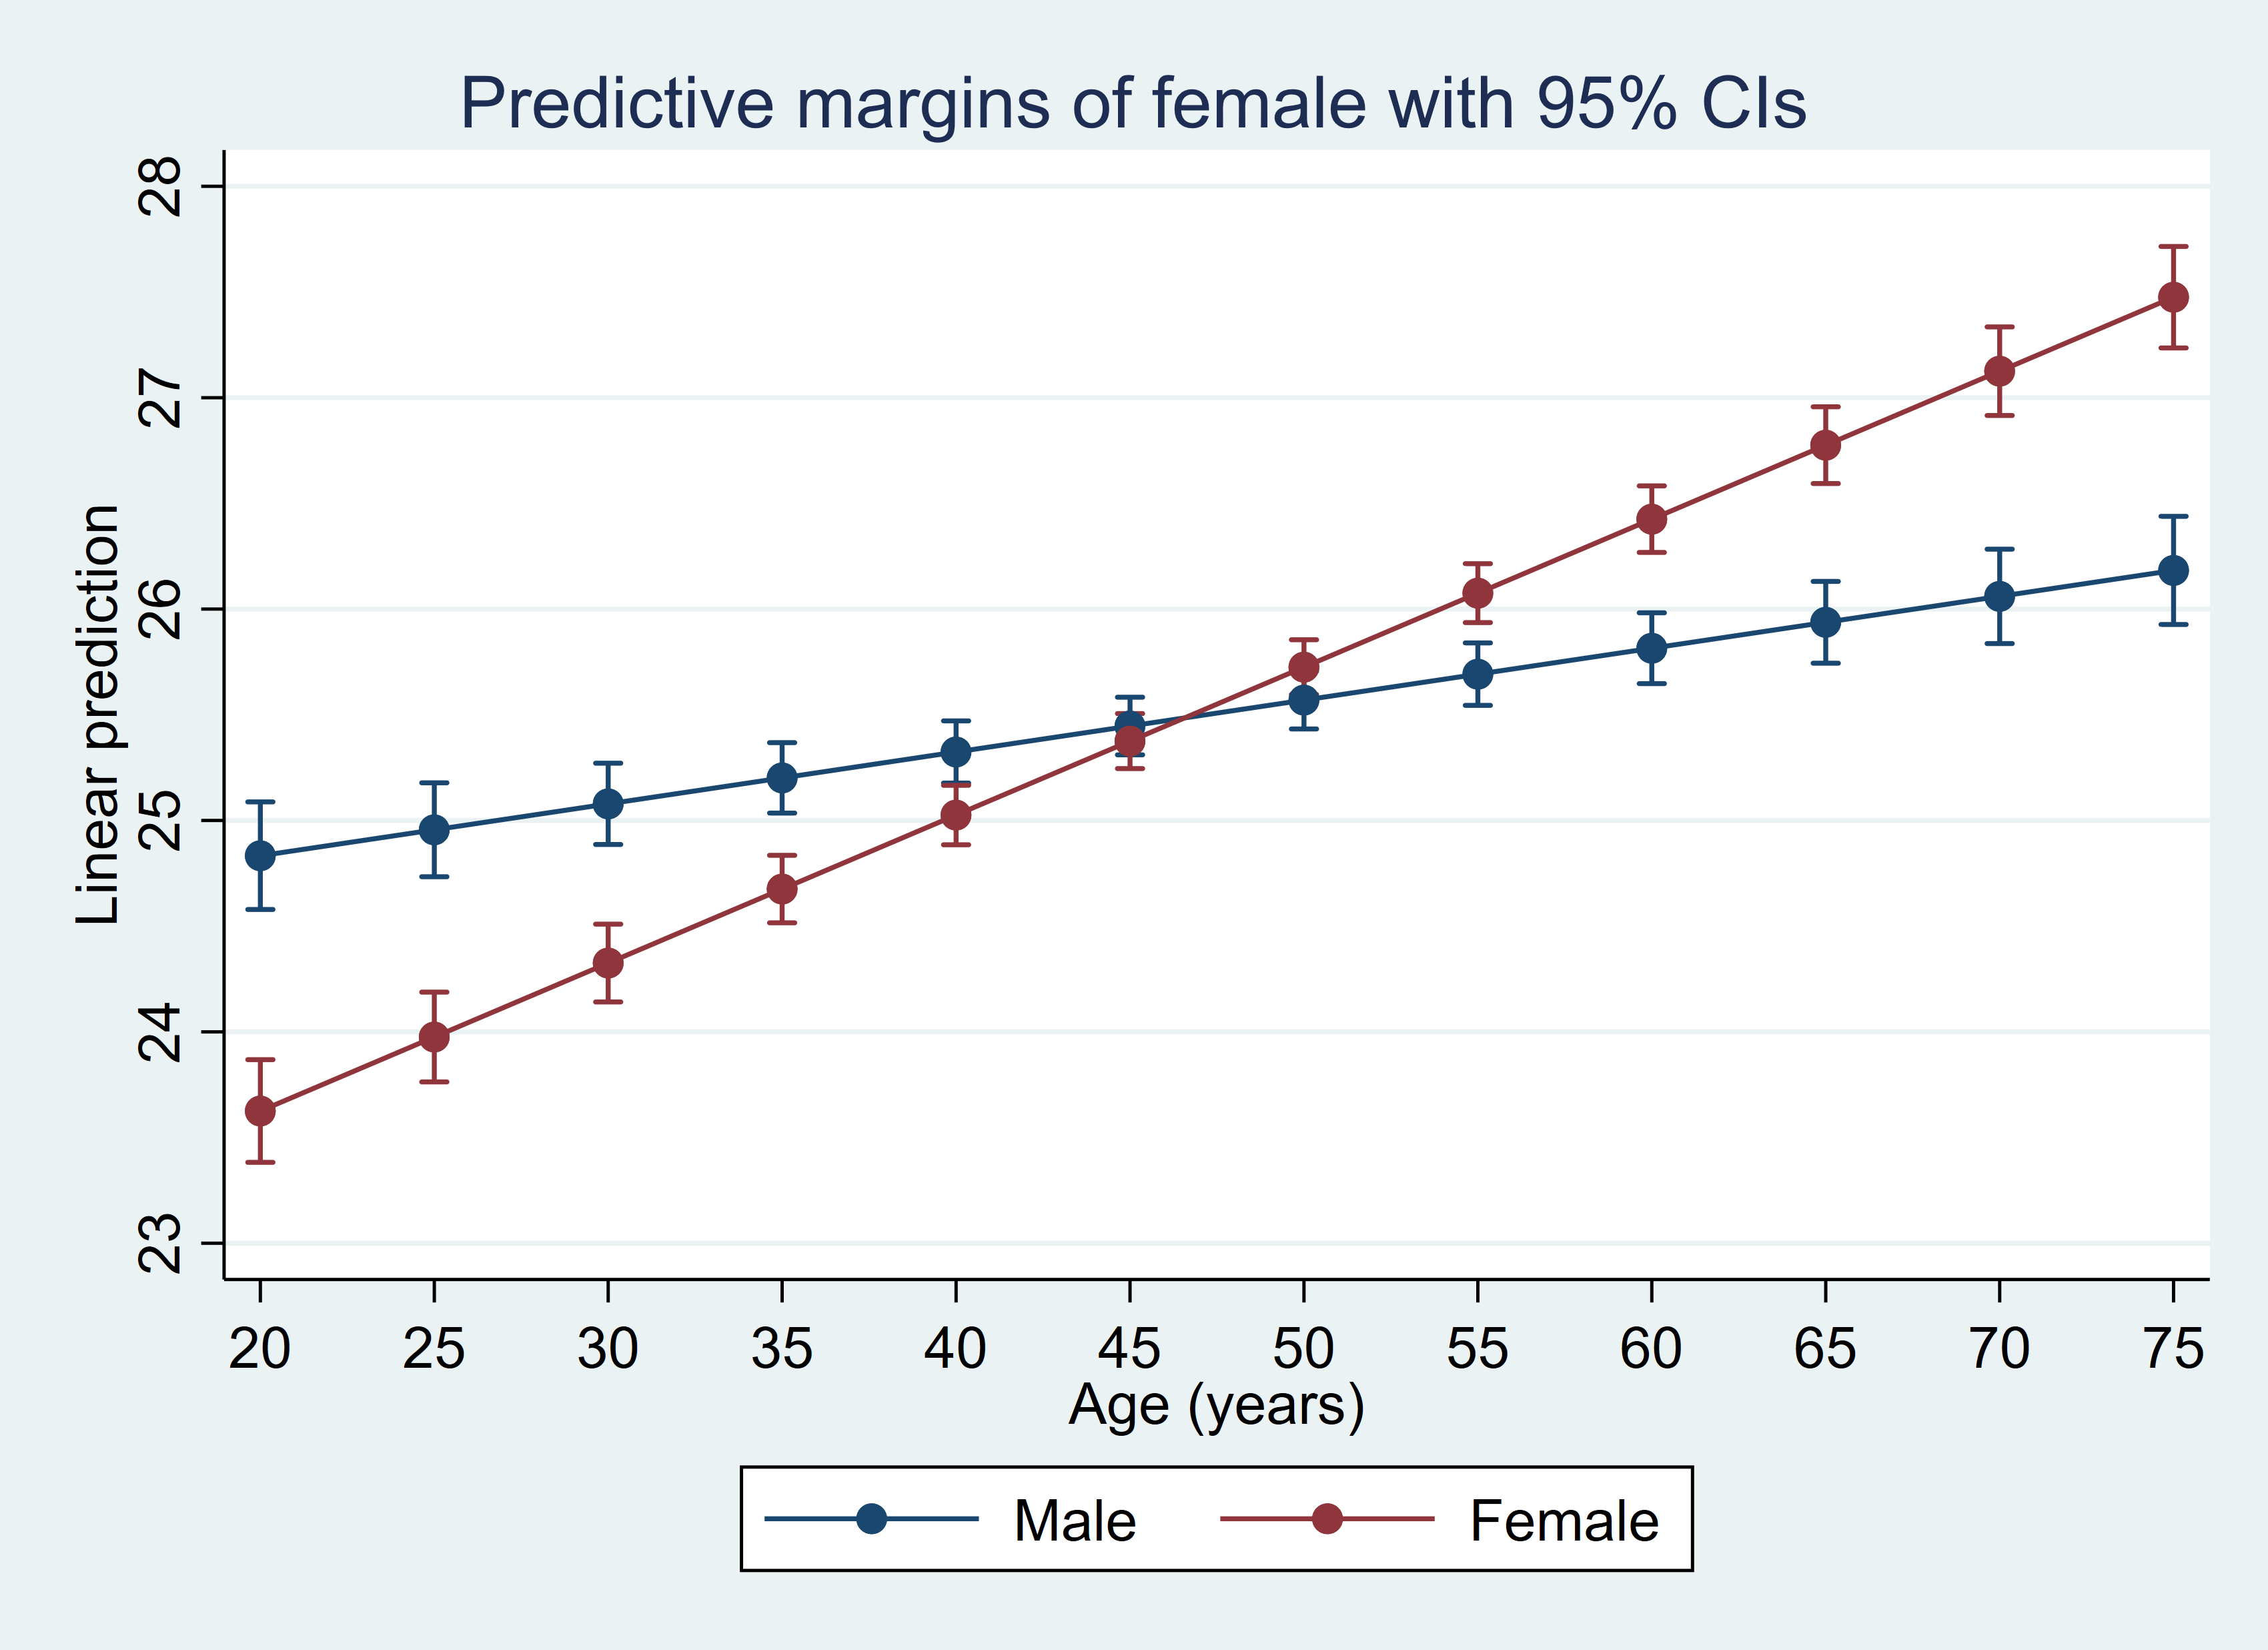

There is a statistically significance age effect on gender for body mass index, where age has a stronger effect on women's BMI as compared to men.

Interactions between two numeric variables.

In [58]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear

In [60]:
codebook tcresult


--------------------------------------------------------------------------------
tcresult                                               Serum cholesterol (mg/dL)
--------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [80,828]                      Units: 1
         Unique values: 316                       Missing .: 0/10,351

                  Mean:  217.67
             Std. dev.: 49.3869

           Percentiles:     10%       25%       50%       75%       90%
                            160       183       213       247       282


In [59]:
regress bmi c.tcresult i.female c.age


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(3, 10347)     =    150.01
       Model |  10420.9799         3  3473.65996   Prob > F        =    0.0000
    Residual |  239603.182    10,347   23.156778   R-squared       =    0.0417
-------------+----------------------------------   Adj R-squared   =    0.0414
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.8121

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    tcresult |   .0121047   .0010479    11.55   0.000     .0100506    .0141587
             |
      female |
     Female  |  -.0614953    .095112    -0.65   0.518    -.2479331    .1249425
         age |   .0351012   .0029951    11.72   0.000     .0292303     .040972
       _cons |   21.

In [61]:
regress bmi i.female c.age##c.tcresult


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(4, 10346)     =    134.07
       Model |  12320.9975         4  3080.24938   Prob > F        =    0.0000
    Residual |  237703.165    10,346  22.9753687   R-squared       =    0.0493
-------------+----------------------------------   Adj R-squared   =    0.0489
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.7933

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female |
     Female  |   .0348939   .0953298     0.37   0.714    -.1519709    .2217587
         age |   .1496168   .0129412    11.56   0.000     .1242495     .174984
    tcresult |   .0392758   .0031649    12.41   0.000      .033072    .0454797
             |
       c.age#|
  c.t

In [62]:
summ age tcresult


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74
    tcresult |     10,351    217.6697    49.38694         80        828


In [64]:
margins , at(age=(20(25)75) tcresult=(80(100)830)) atmeans vsquish


Adjusted predictions                                    Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =       80
2._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      180
3._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      280
4._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      380
5._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      480
6._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      580
7._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        t

In [65]:
marginsplot, x(age)
graph export "tcresults_age.png", replace width(3400)



Variables that uniquely identify margins: age tcresult

file C:/Users/acade/.stata_kernel_cache/graph8.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph8.pdf saved as PDF format

(file tcresults_age.png not found)
file tcresults_age.png saved as PNG format


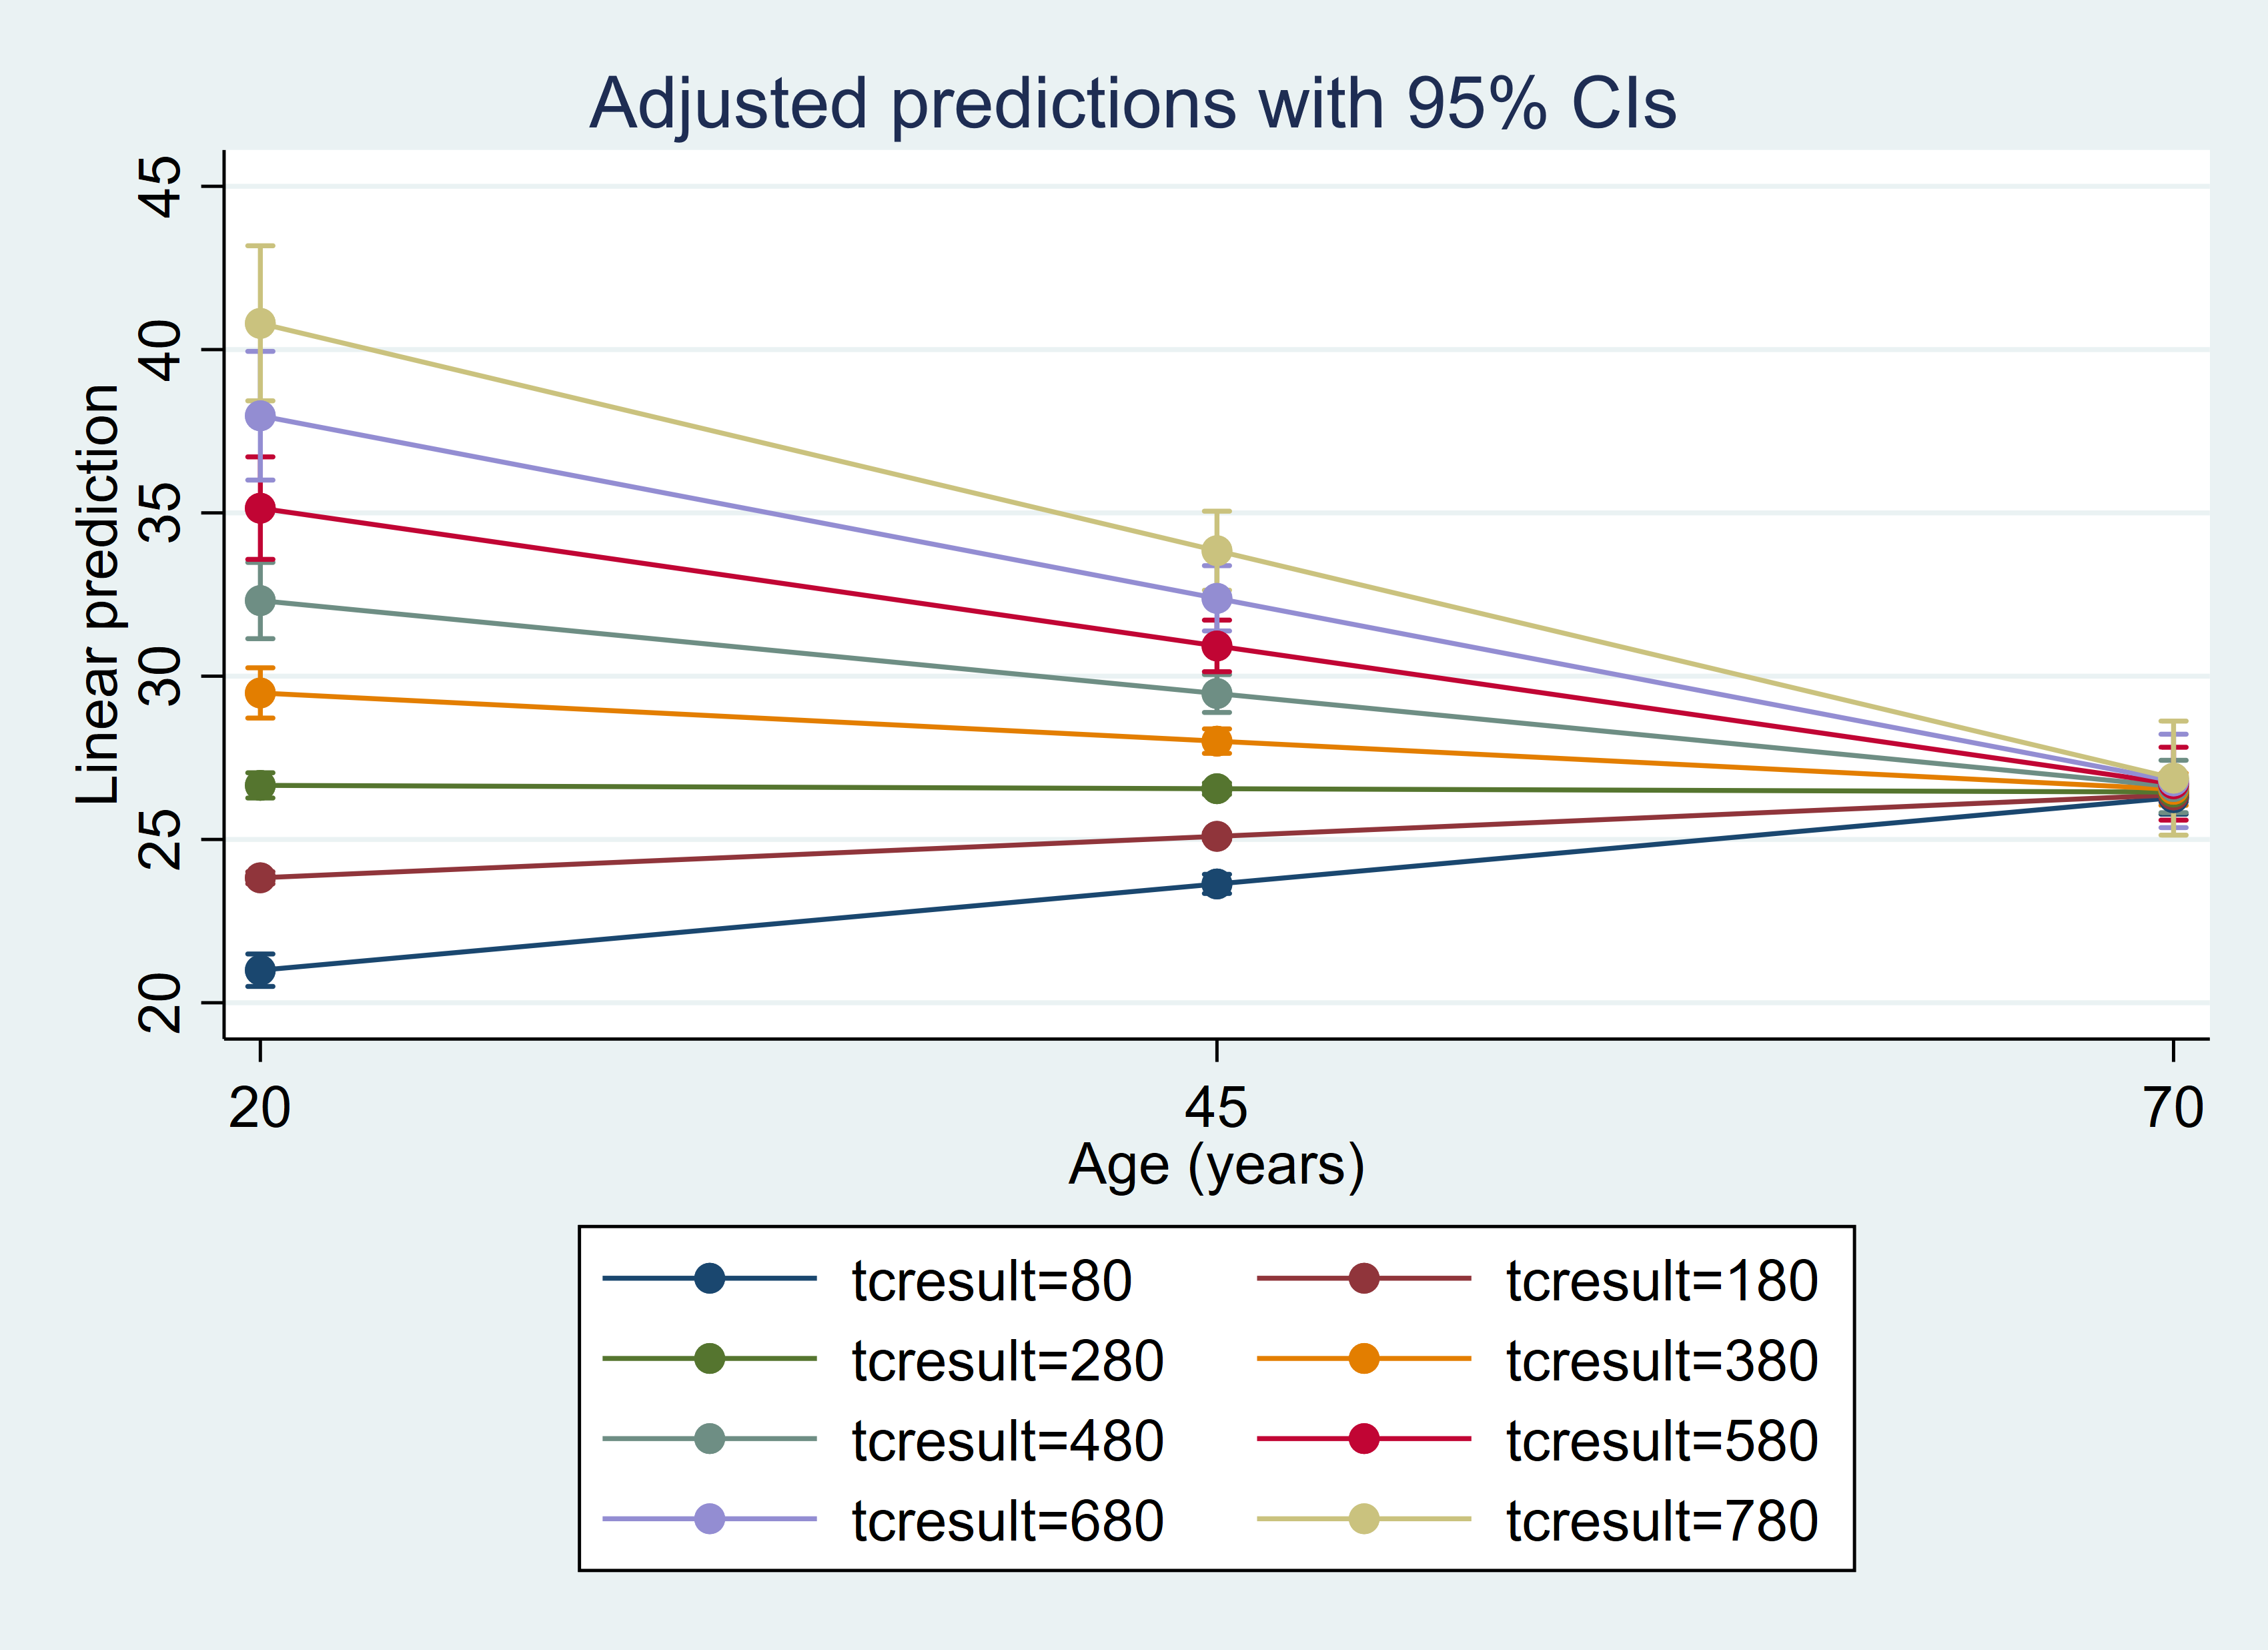

There is a statistically significance interaction between cholesterol and age on body mass index. The graph demonstrates that the effect of age on BMI gets steeper as cholesterol increases. 